Name: Daniel Niazov

ID: 207437997

Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# **Review**

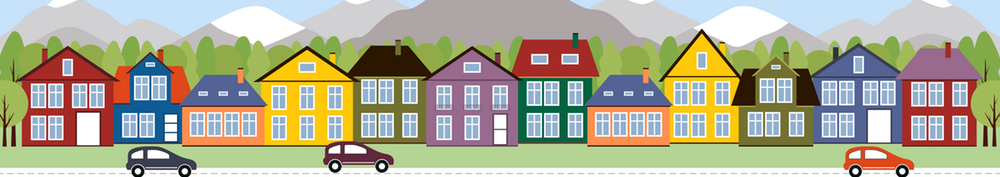



Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [ ]:
!pip install --upgrade plotly
!pip install sweetviz

     |████████████████████████████████| 27.7 MB 1.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 15.1 MB 4.4 MB/s 


# **Introduction**

In this notebook I'm tried to predict house prices by using linear regression on different data divisions and feature selection and also by regulation.

# **Import Python Packages**

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# load "train" data set
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_ids = test['Id']
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

                                             |          | [  0%]   00:00 -> (? left)


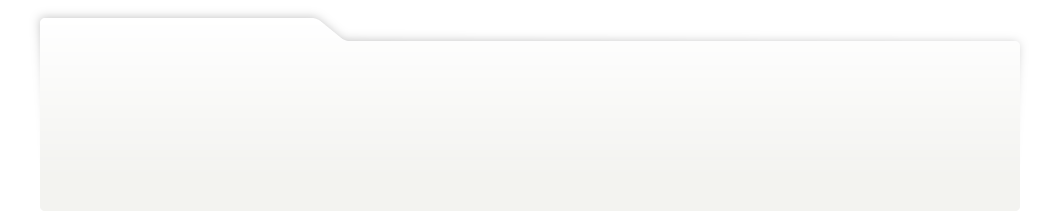
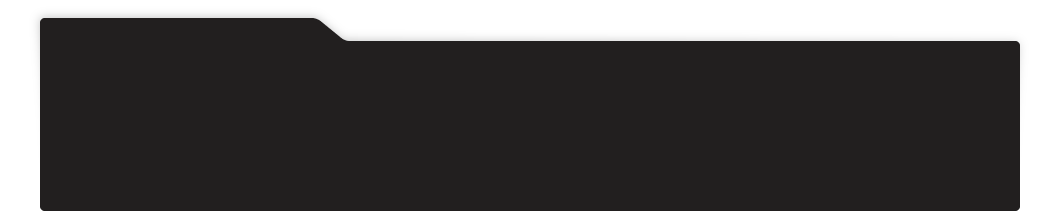
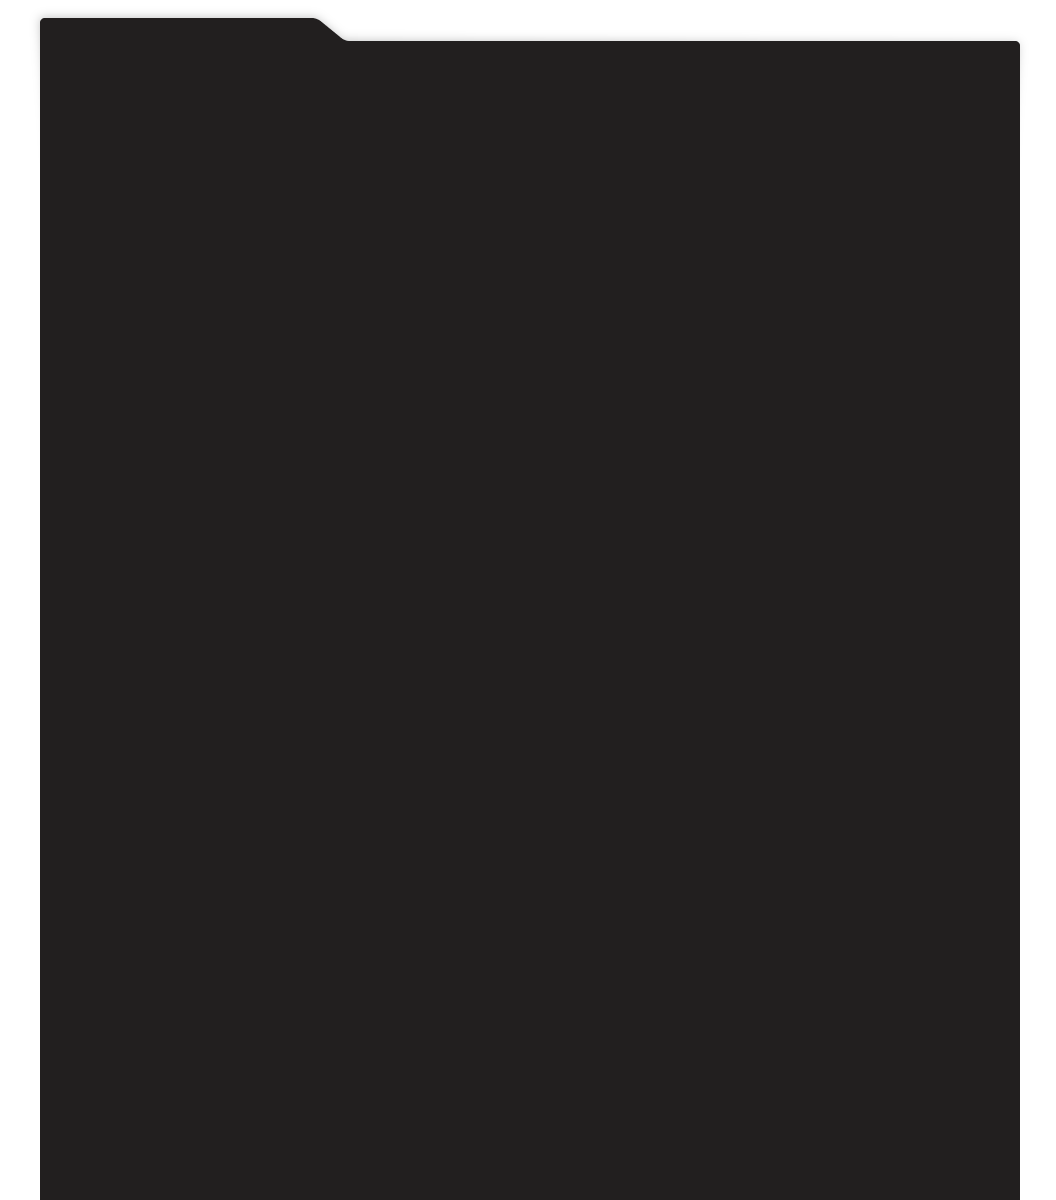
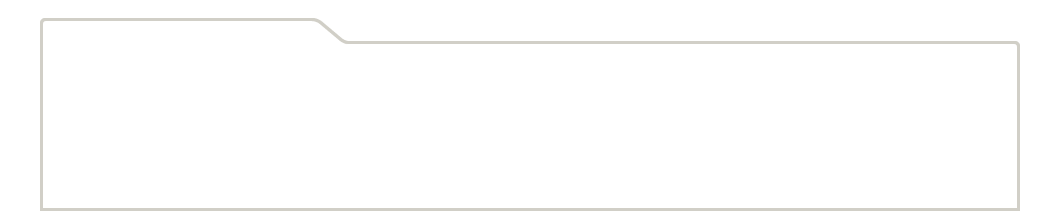
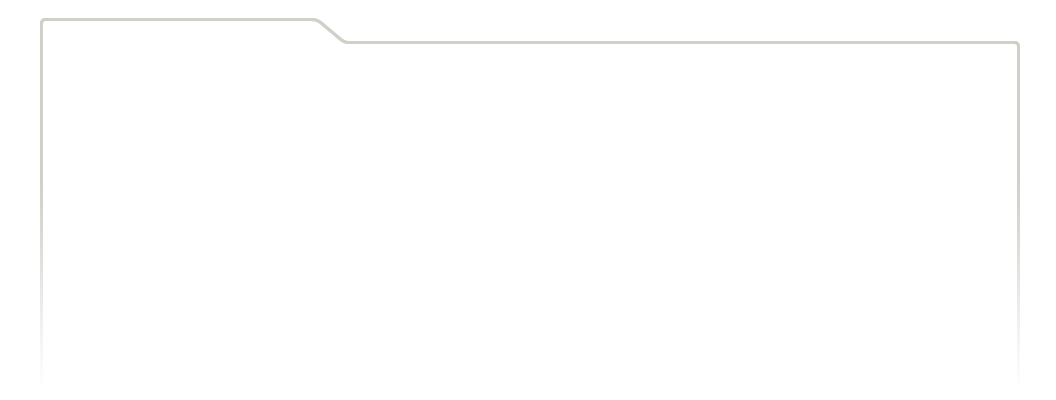
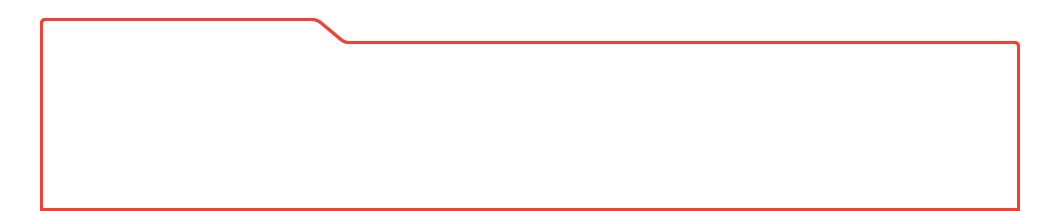
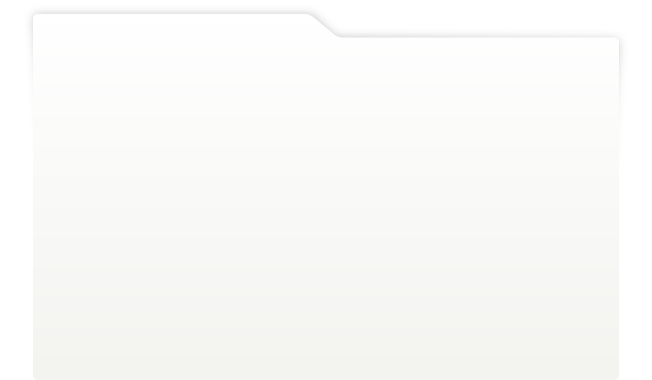
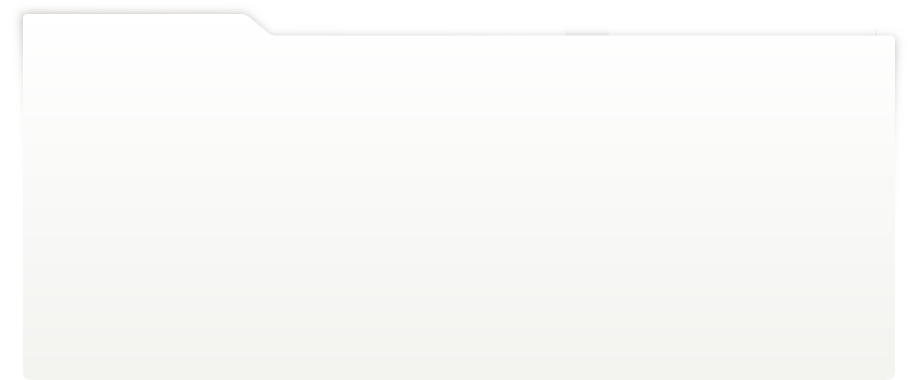
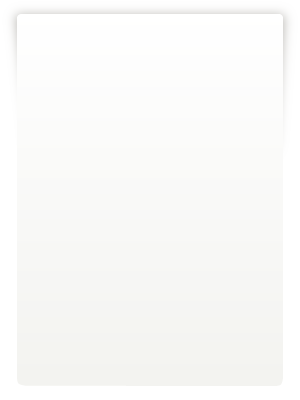
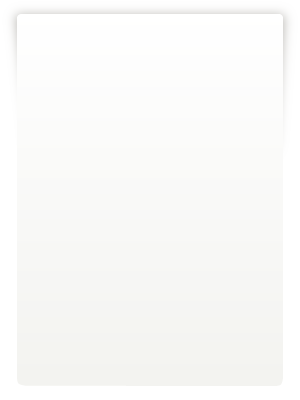
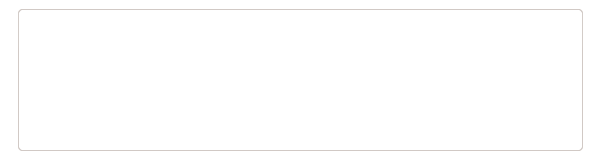
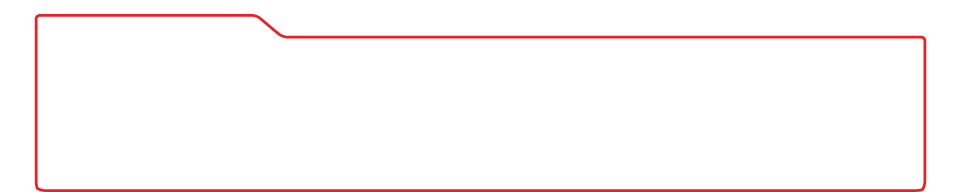
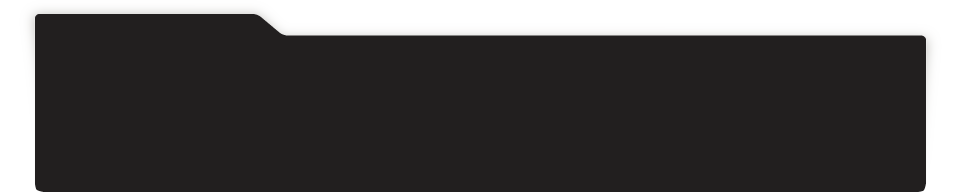
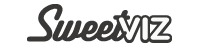
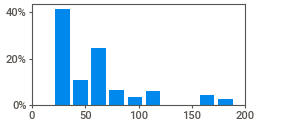
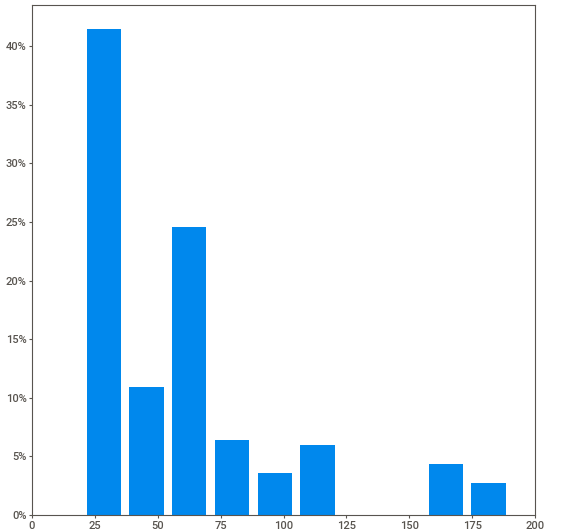
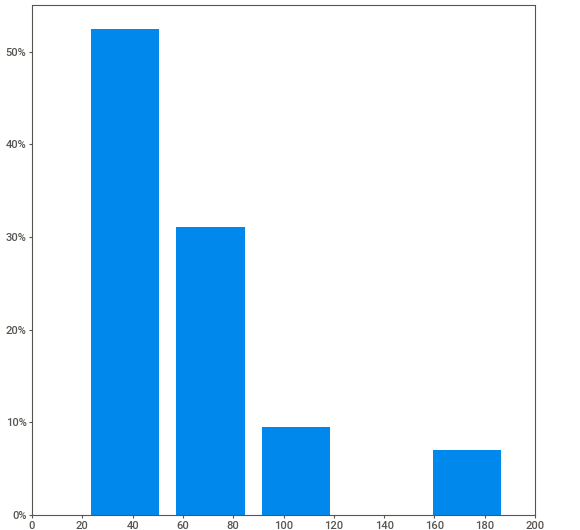
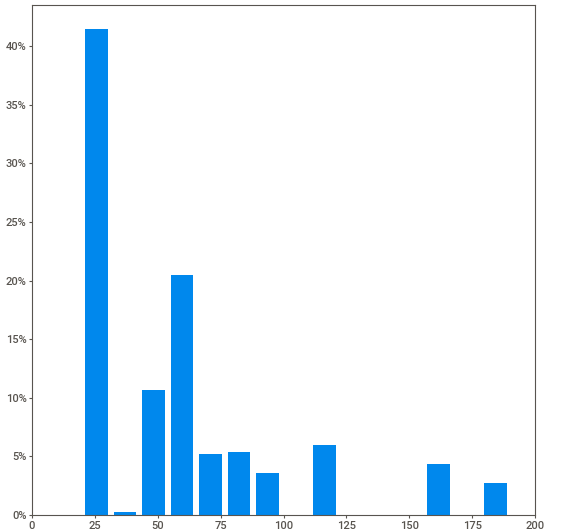
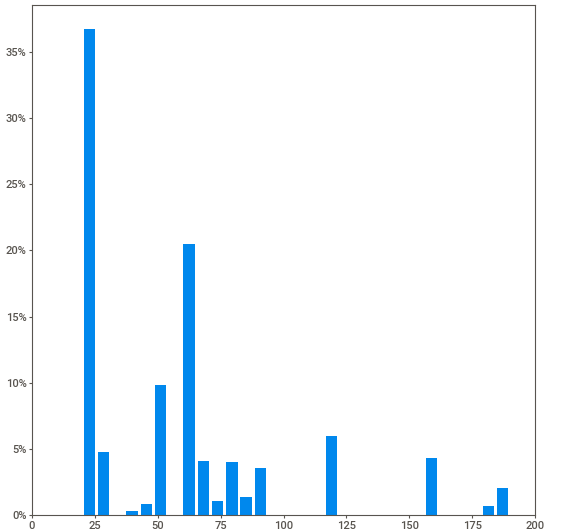
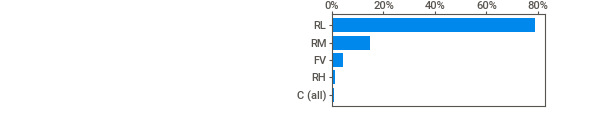
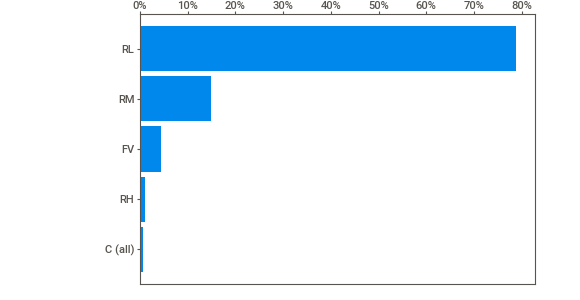
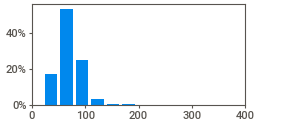
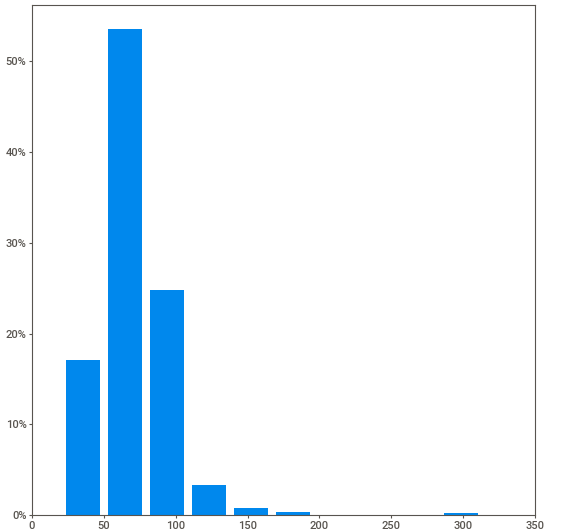
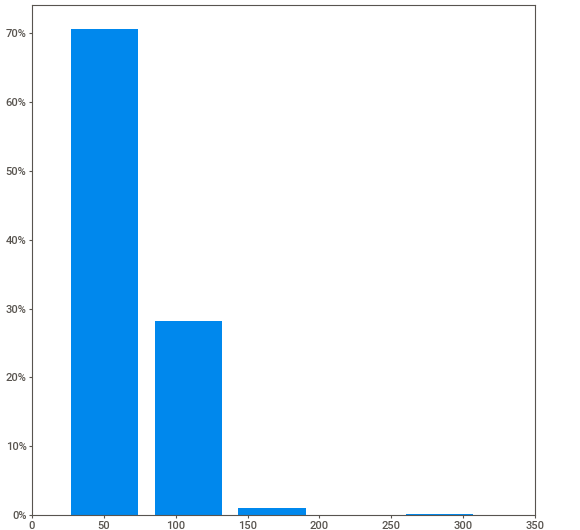
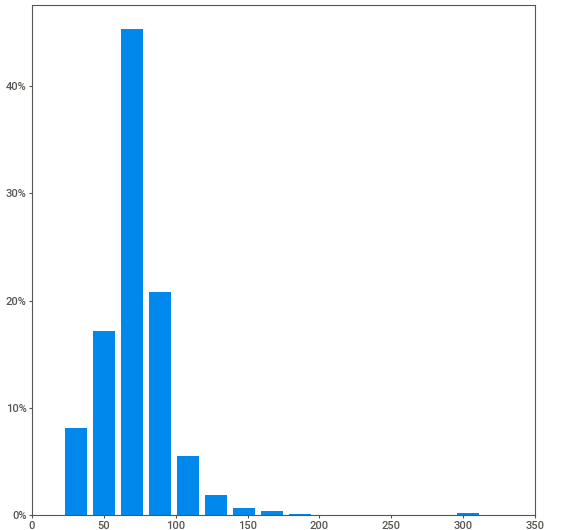
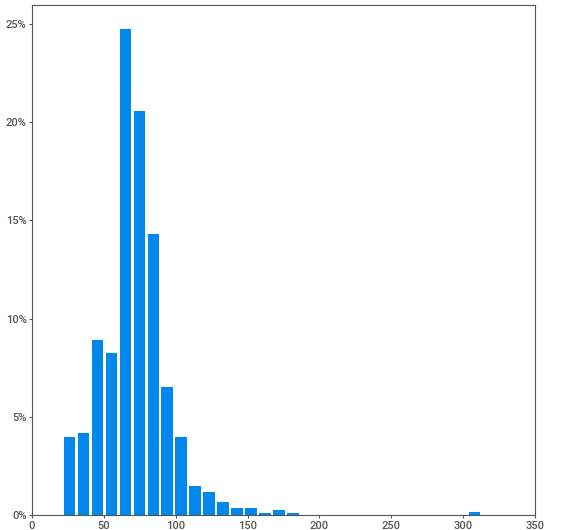
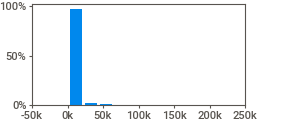
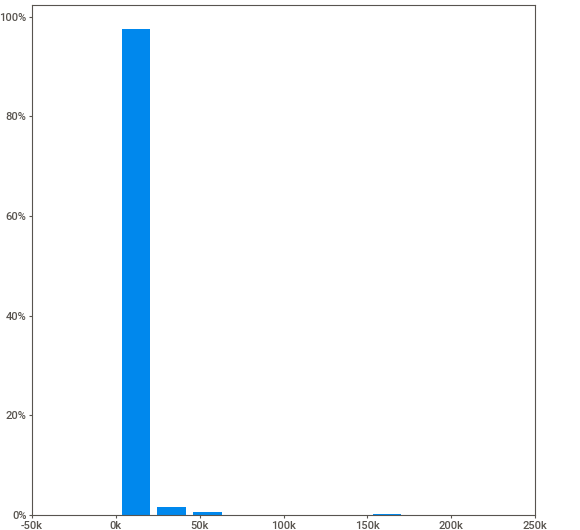
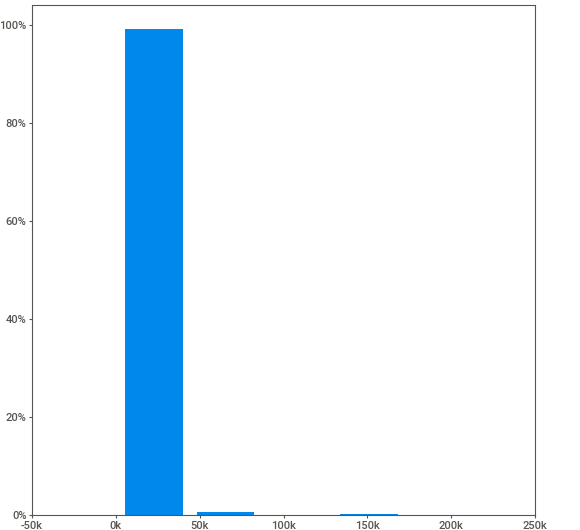
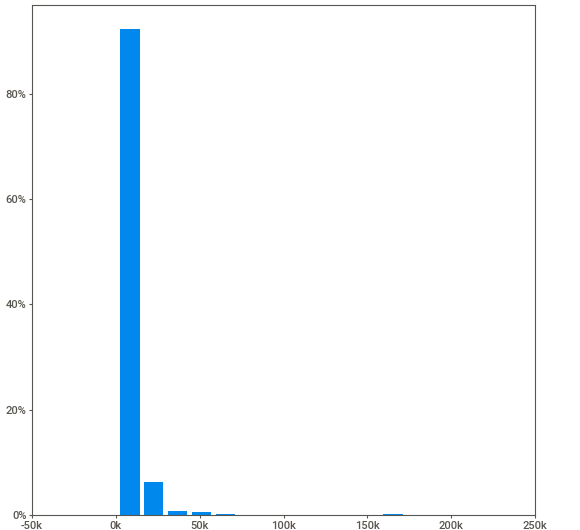
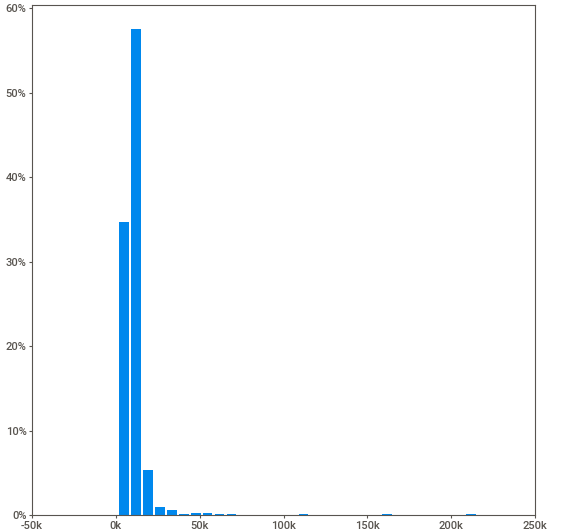
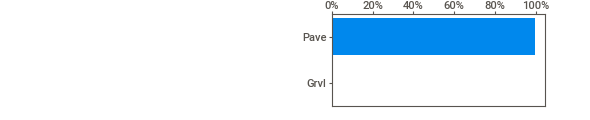
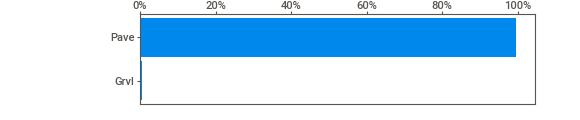
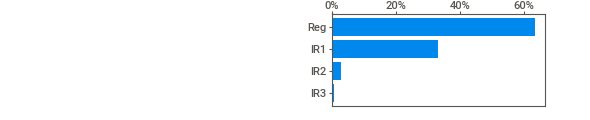
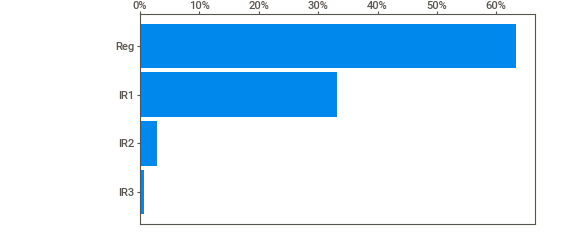
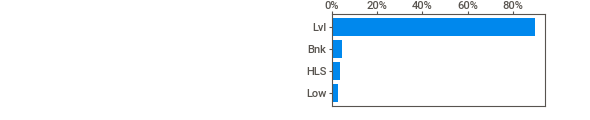
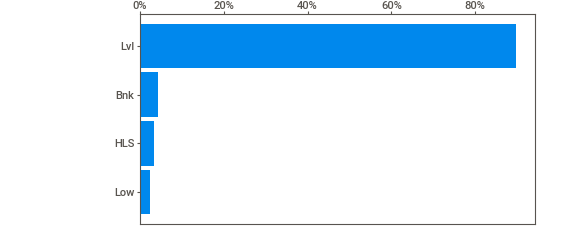
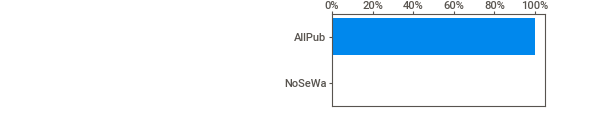
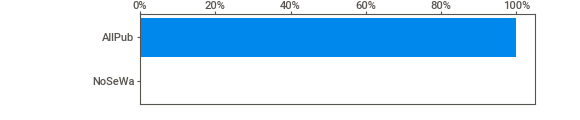
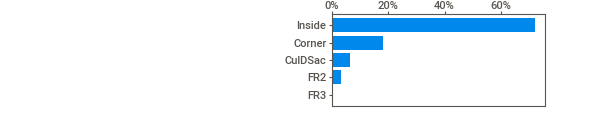
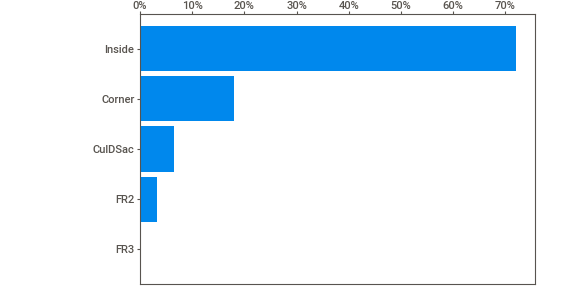
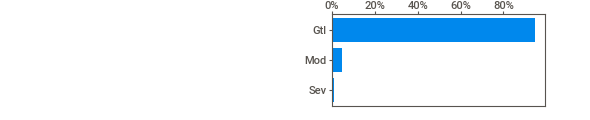
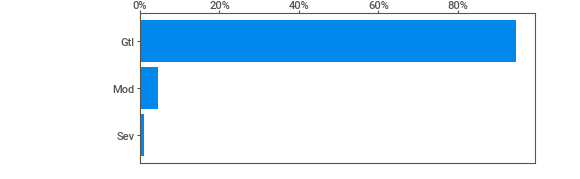
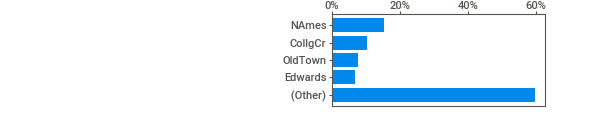
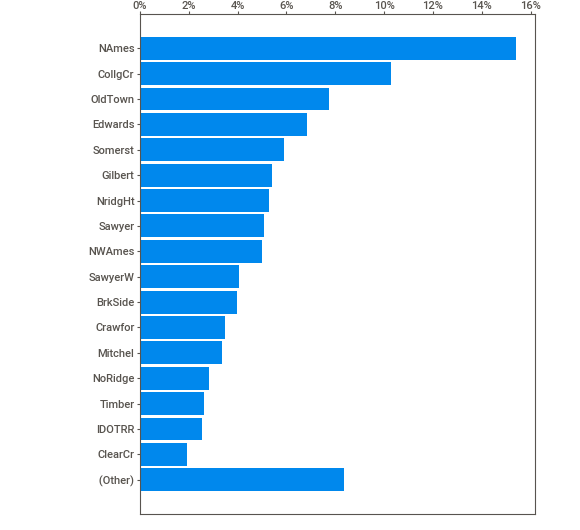
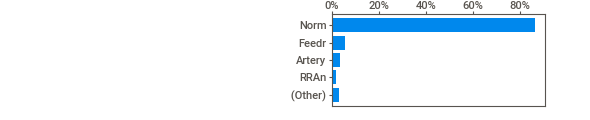
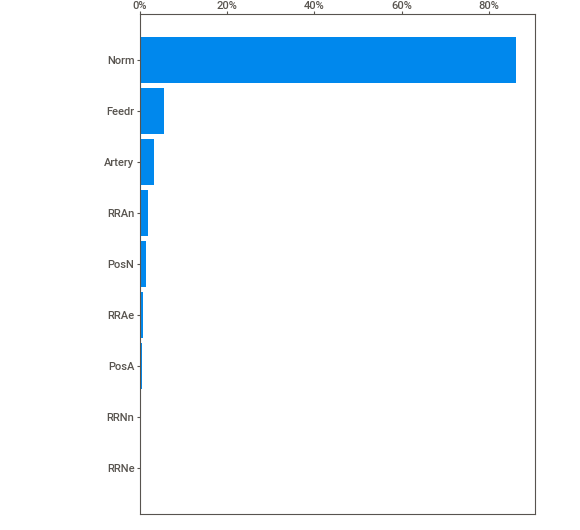
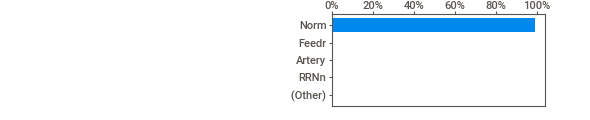
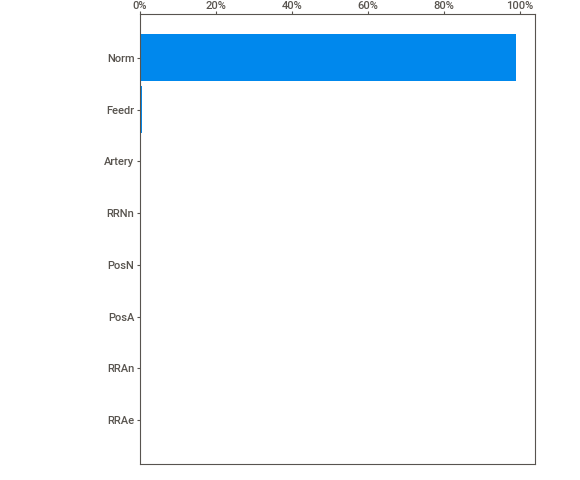
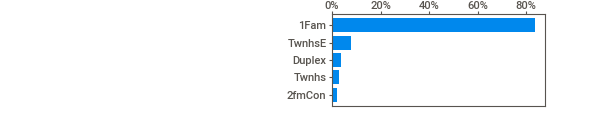
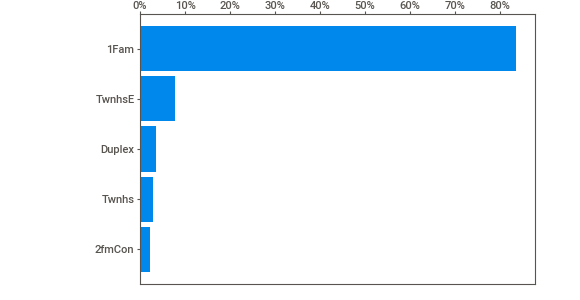
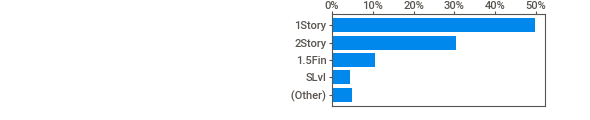
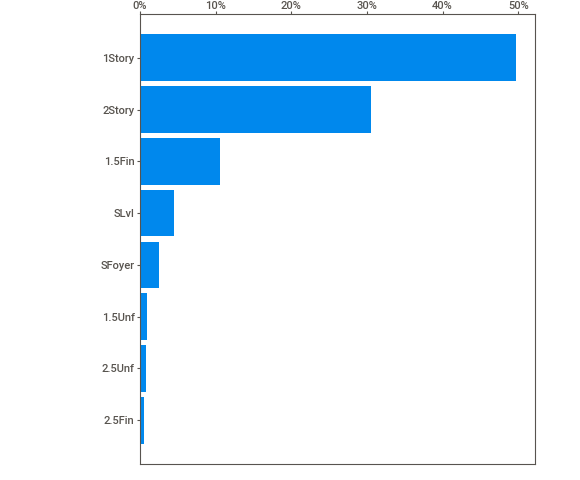
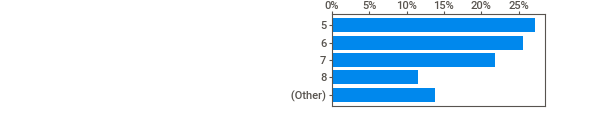
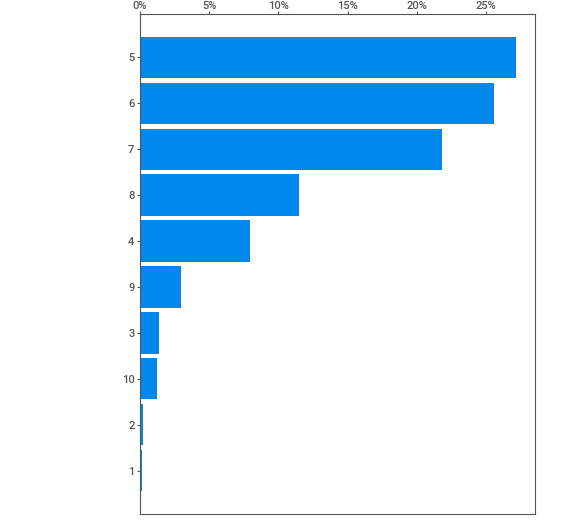
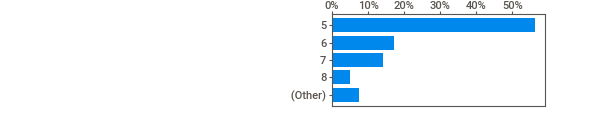
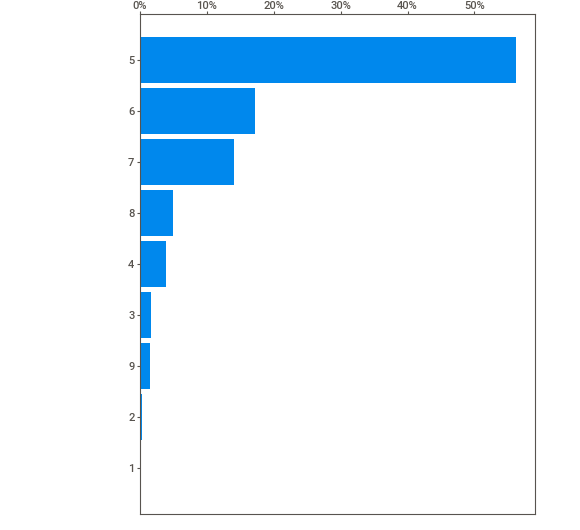
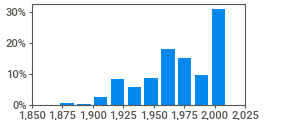
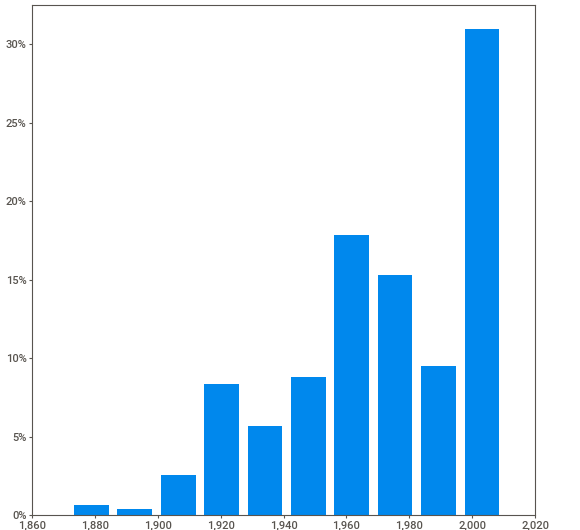
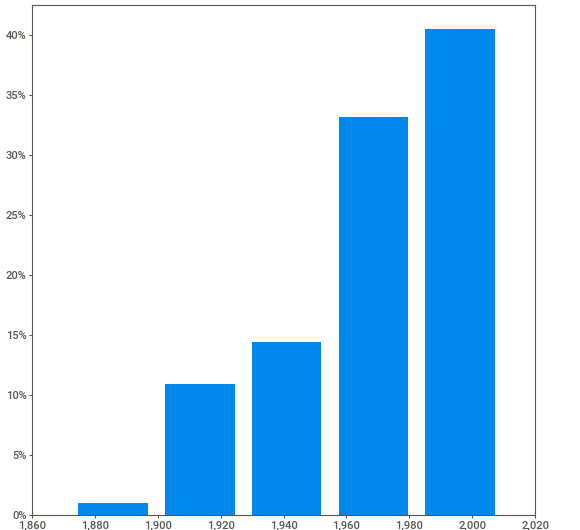
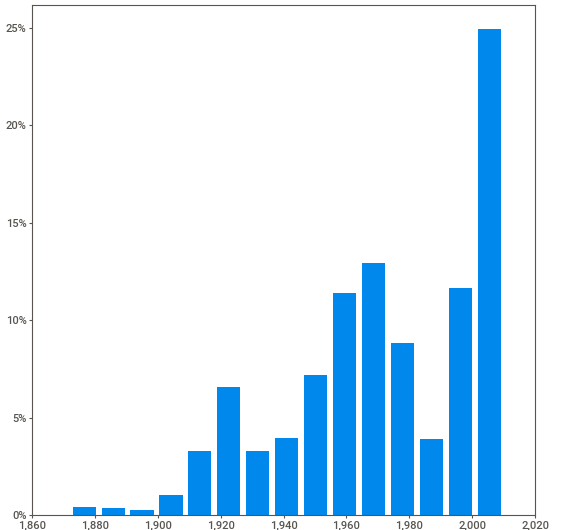
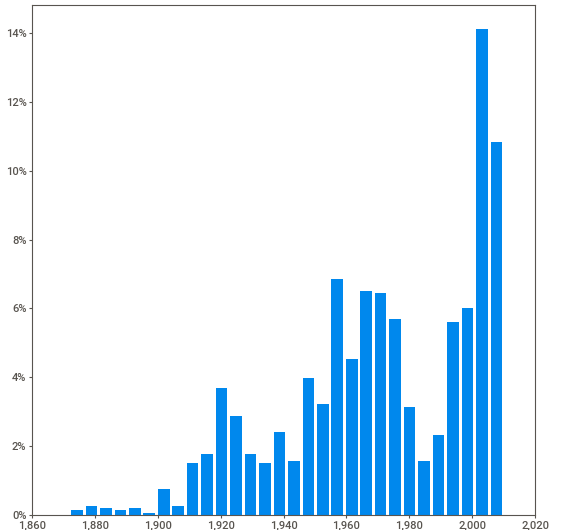
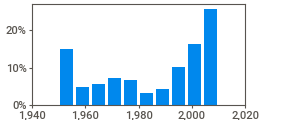
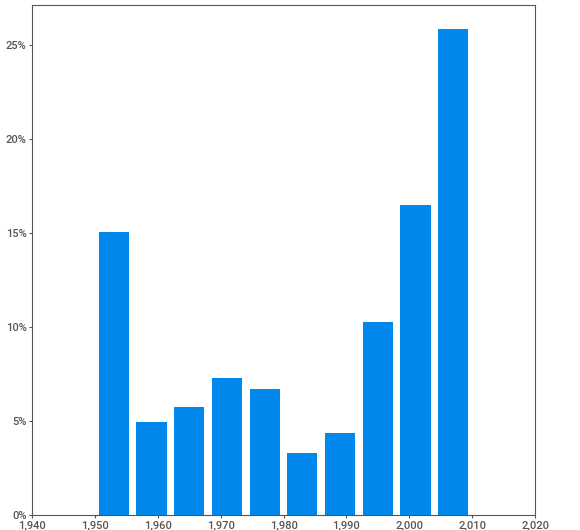
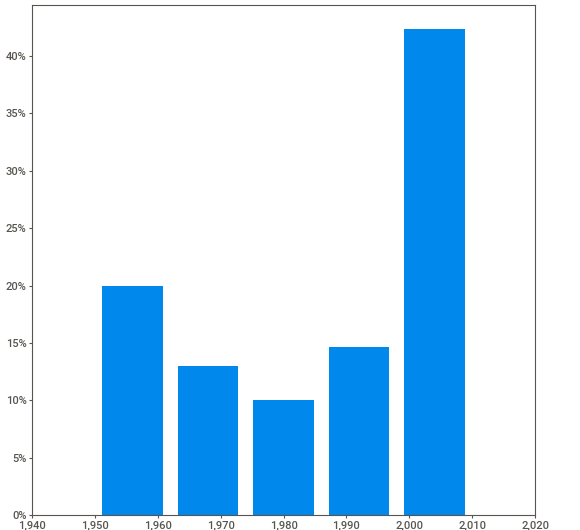
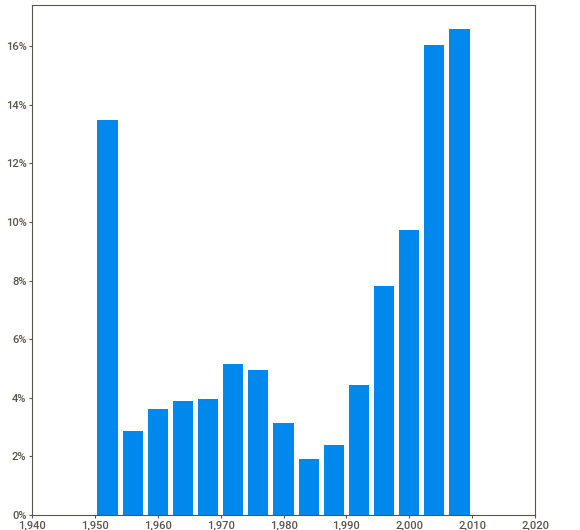
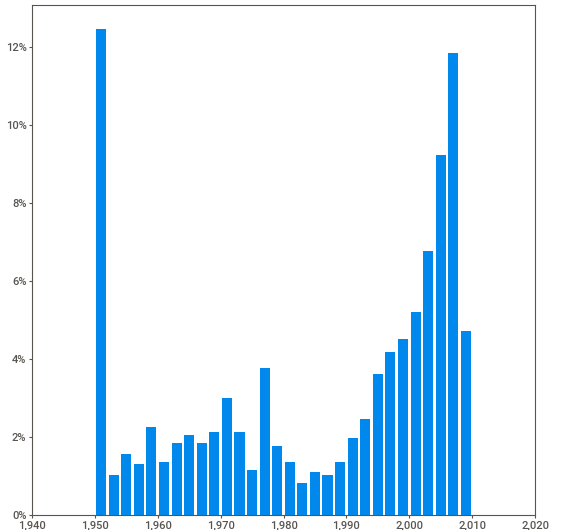
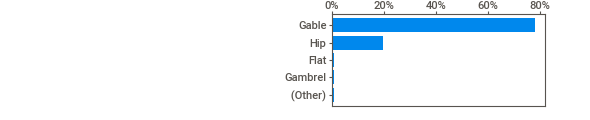
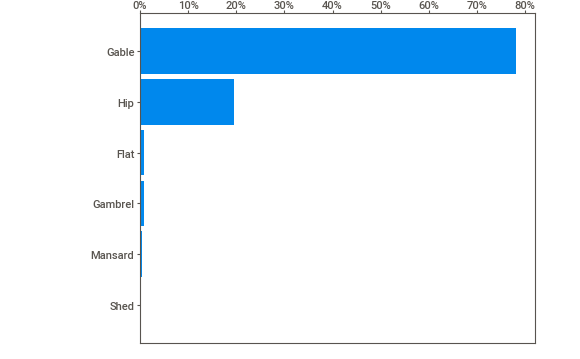
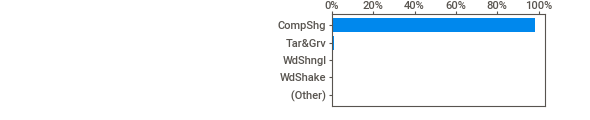
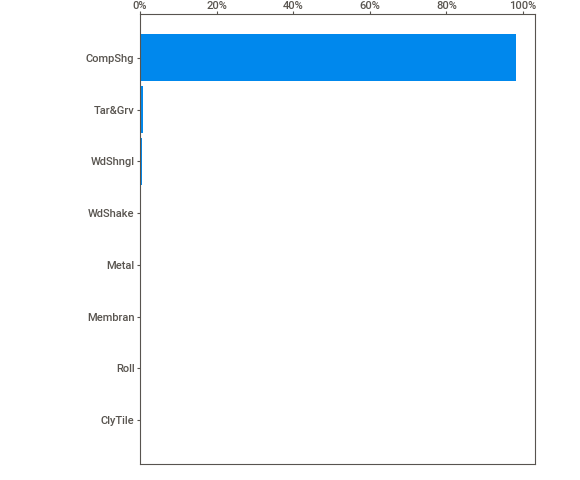
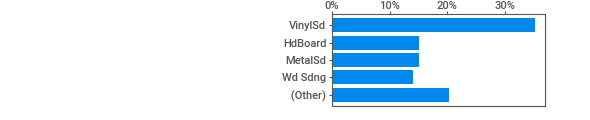
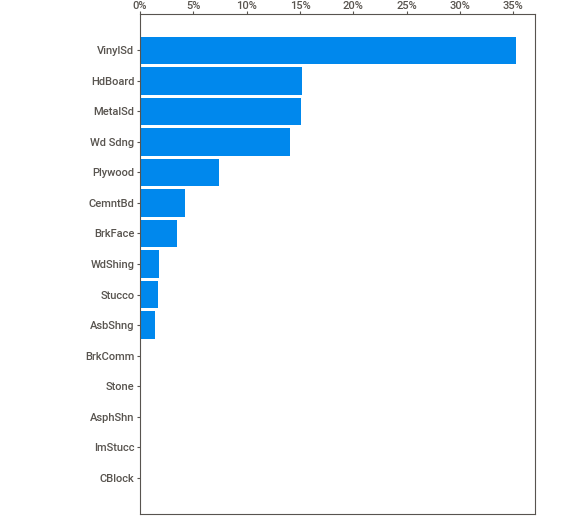
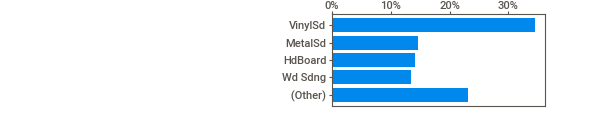
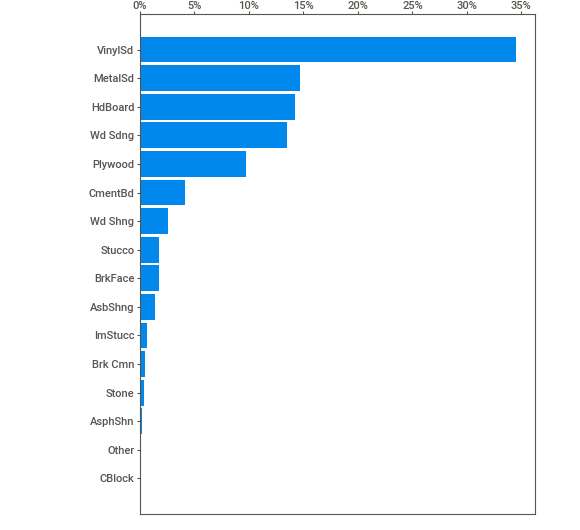
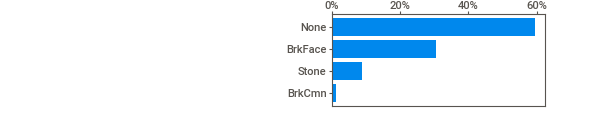
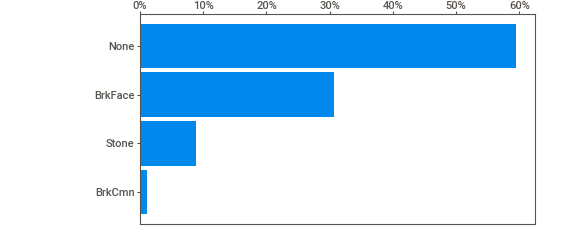
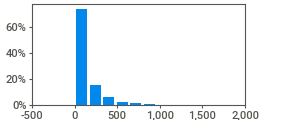
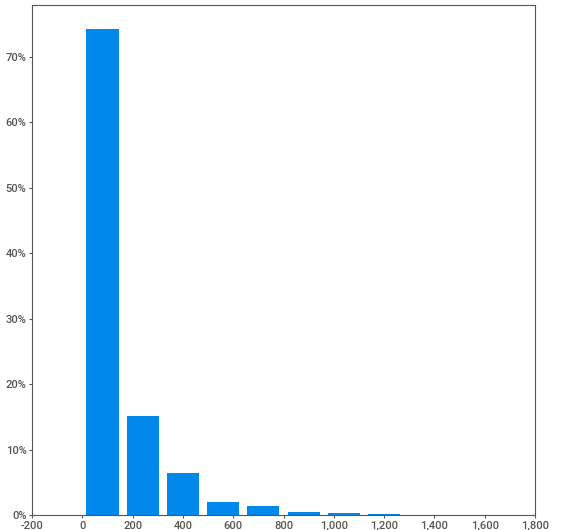
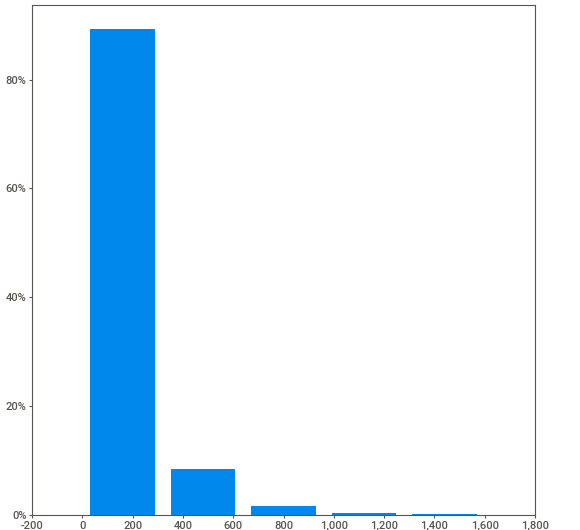
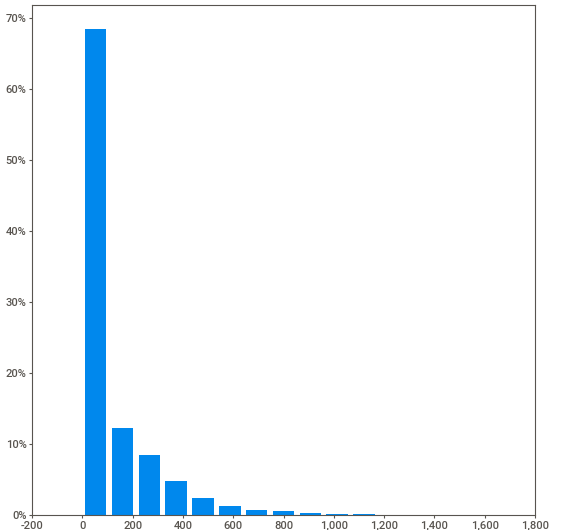
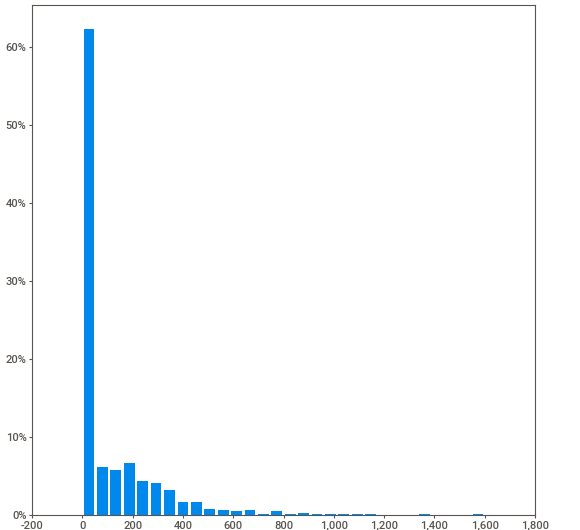
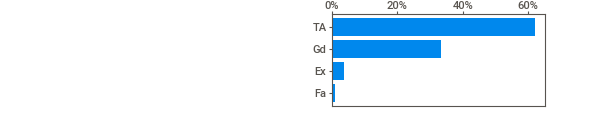
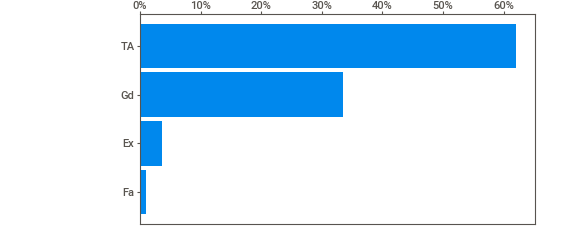
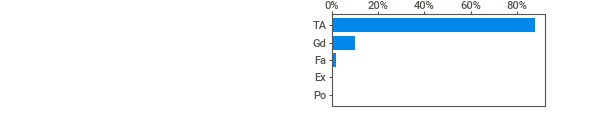
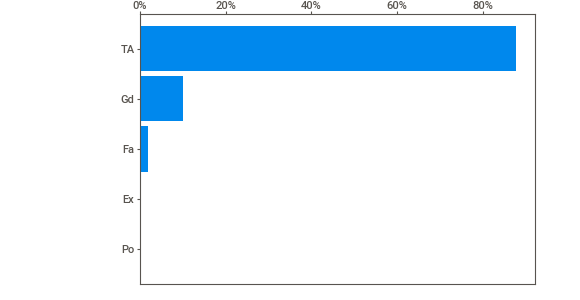
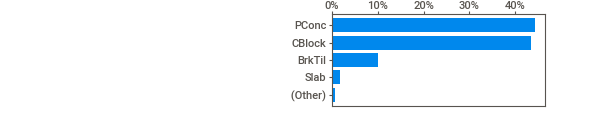
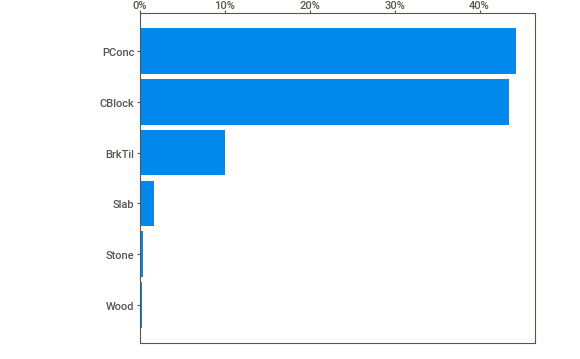
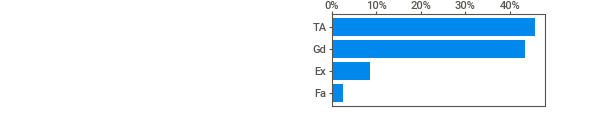
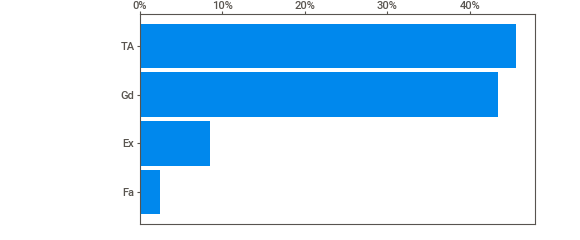
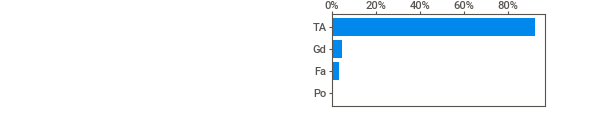
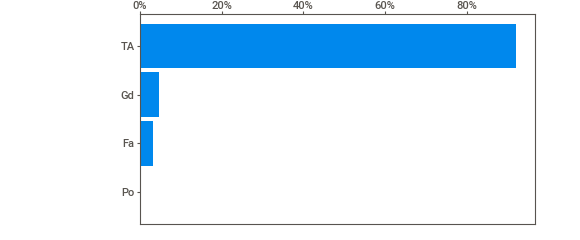
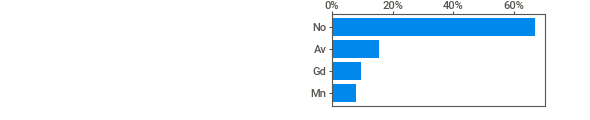
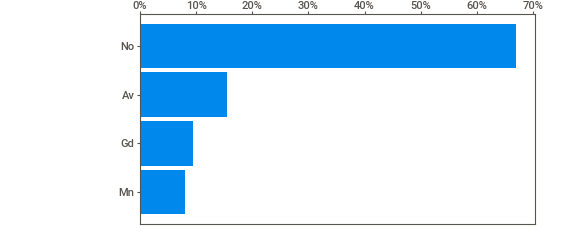
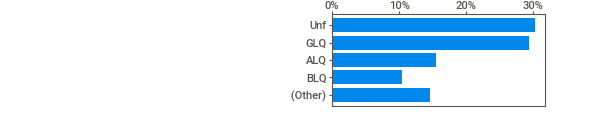
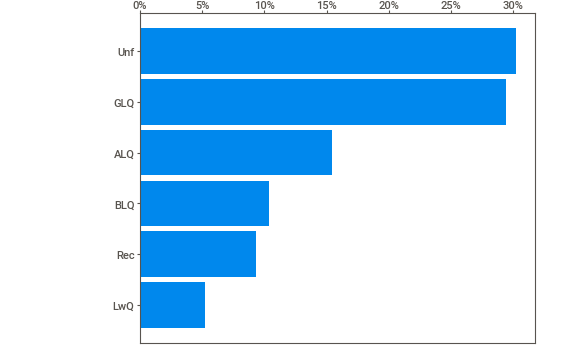
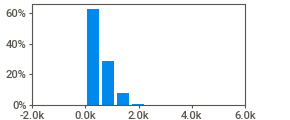
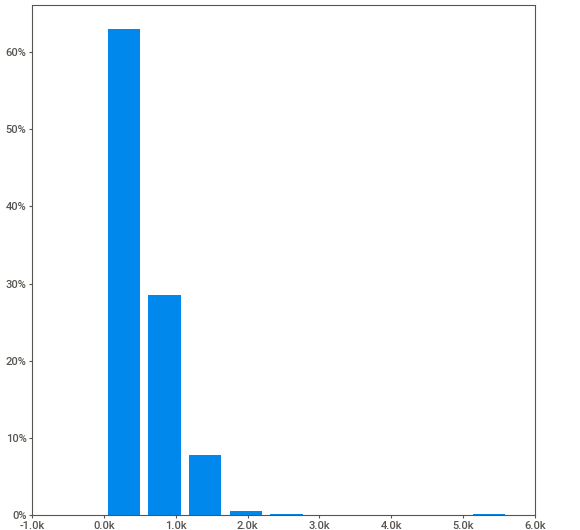
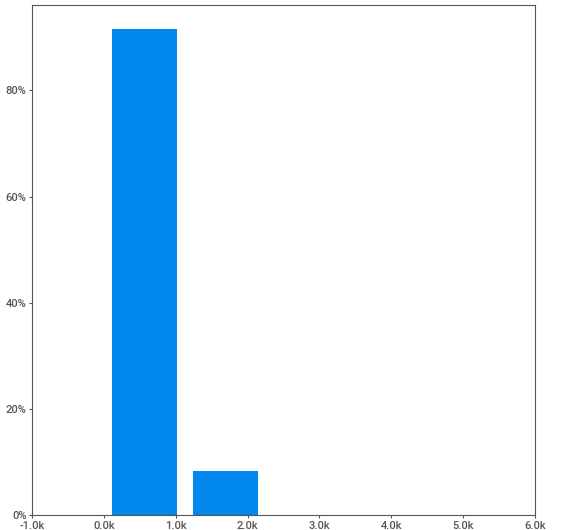
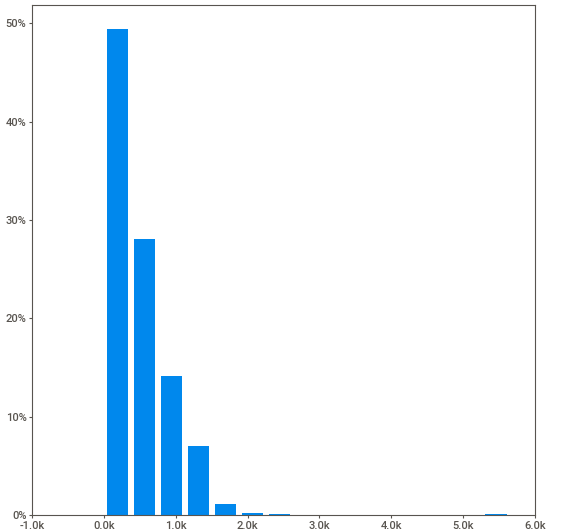
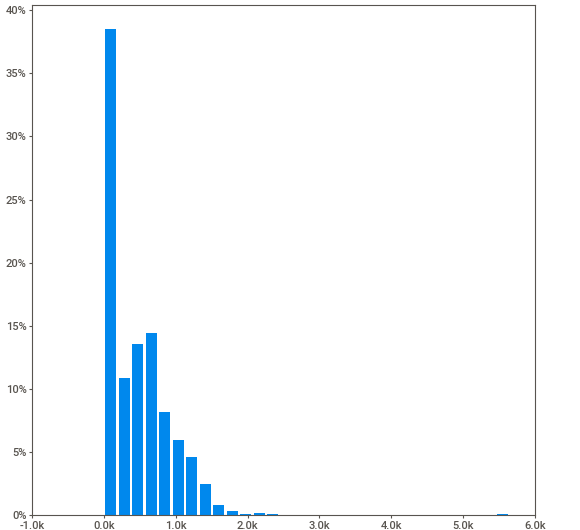
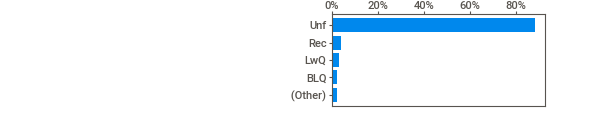
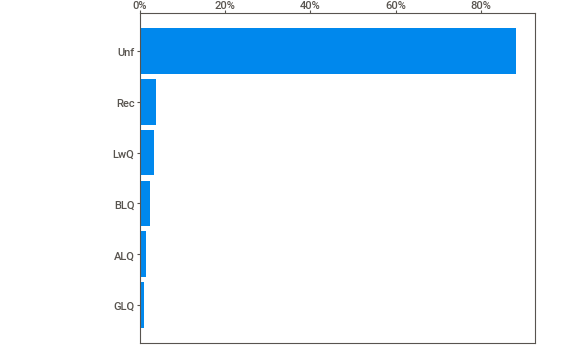
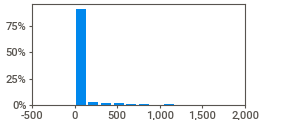
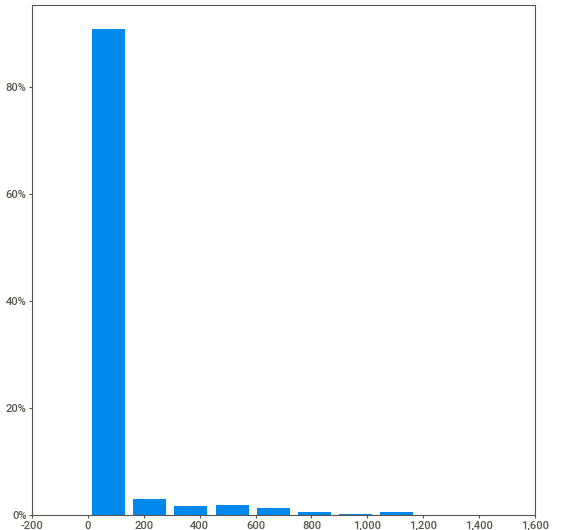
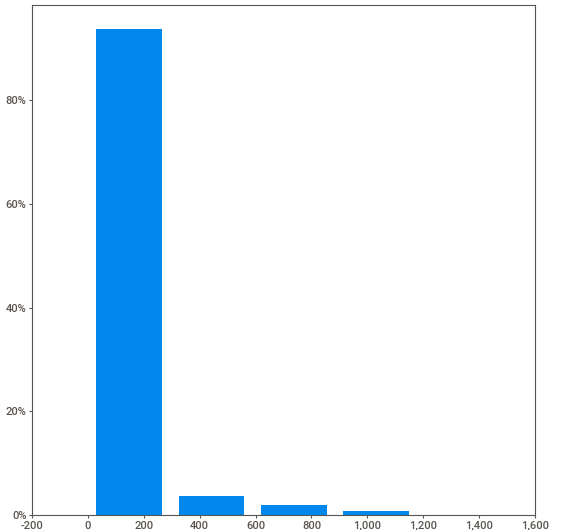
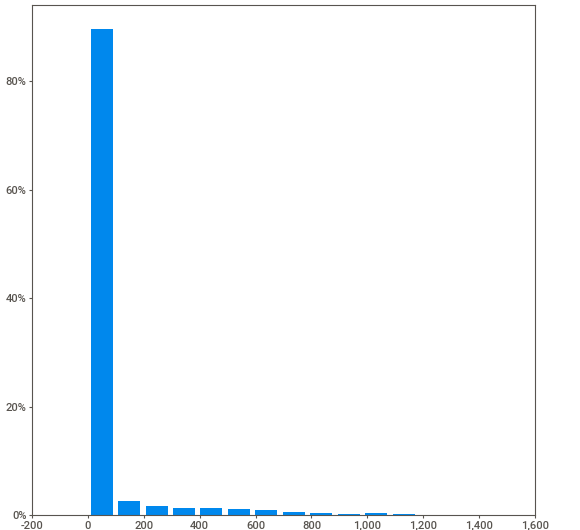
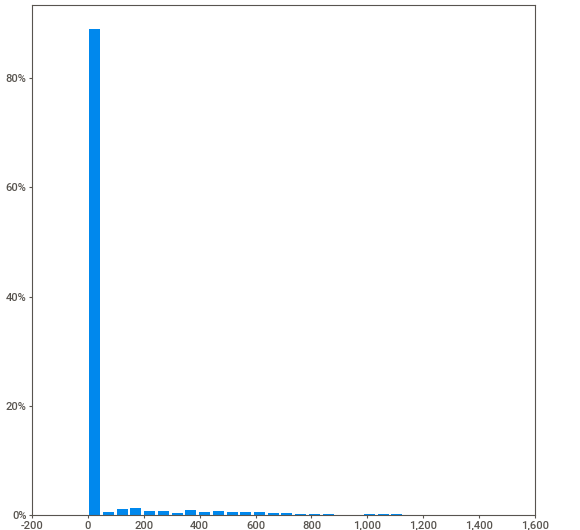
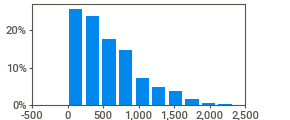
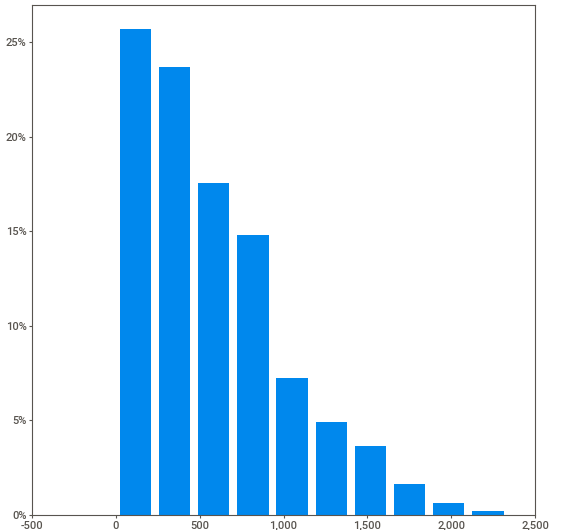
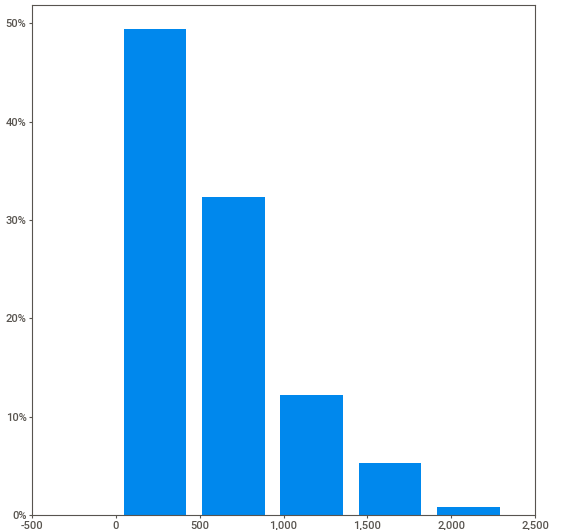
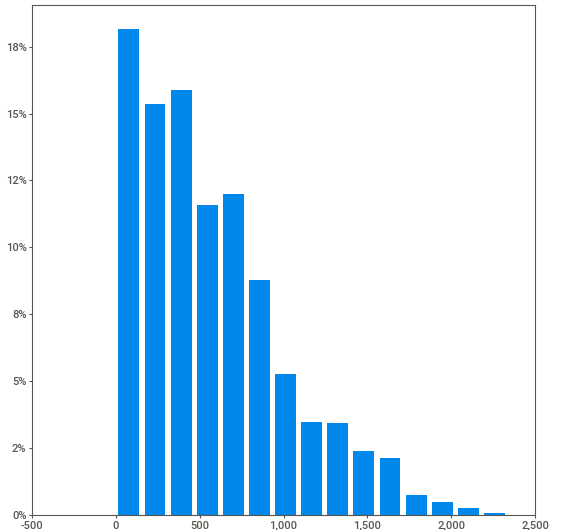
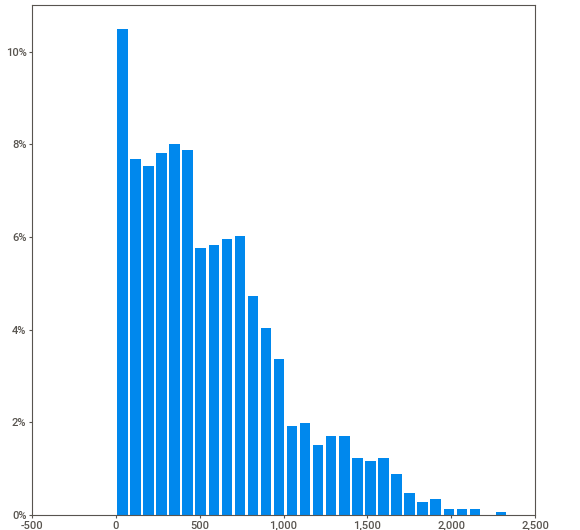
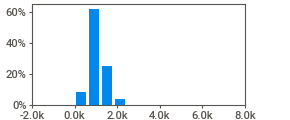
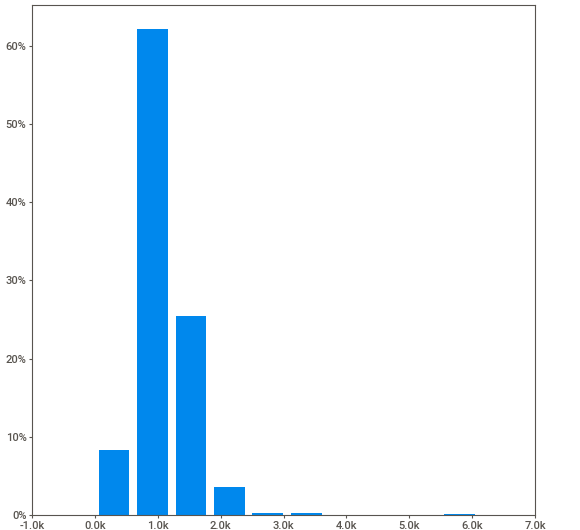
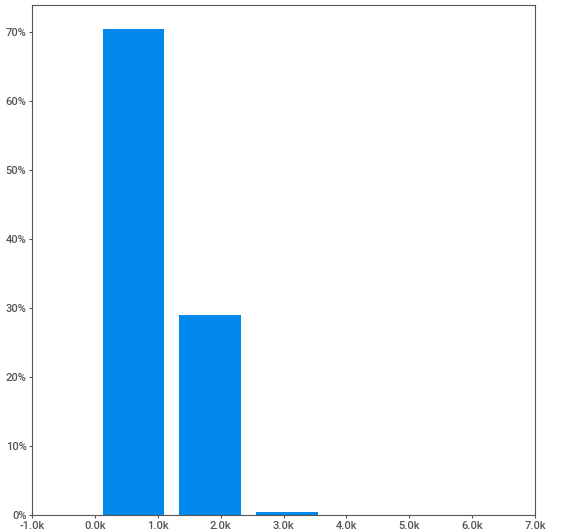
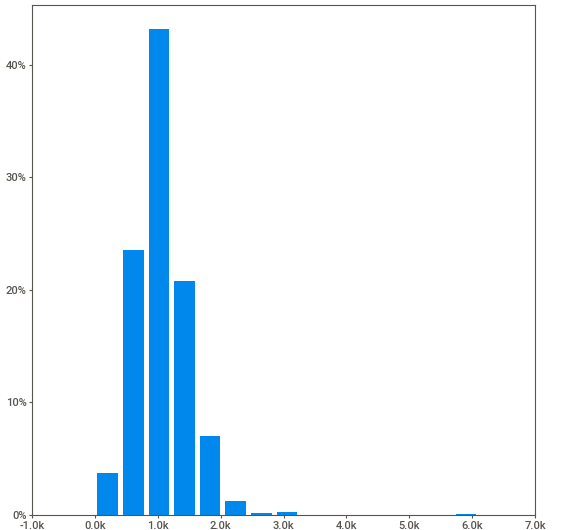
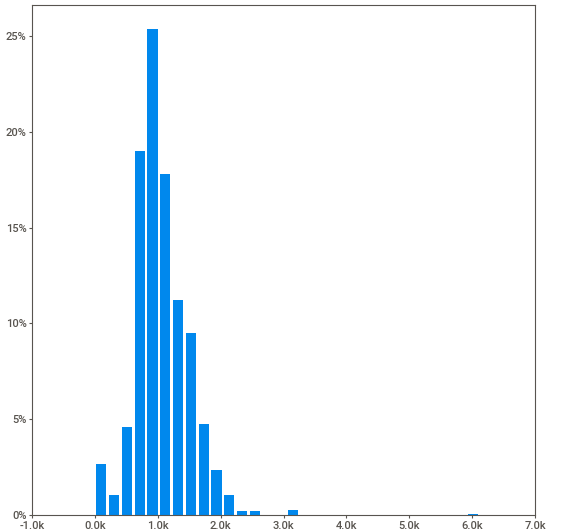
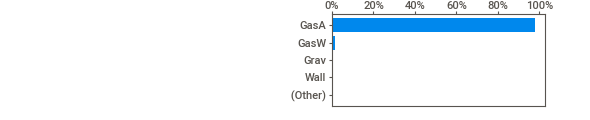
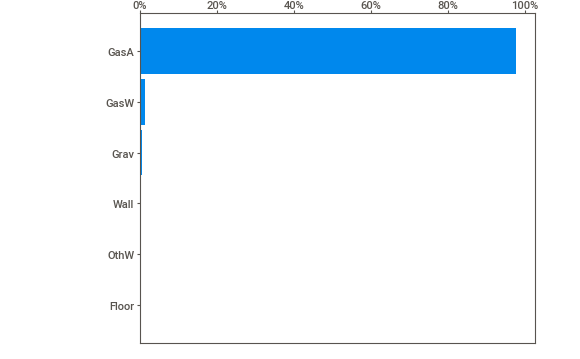
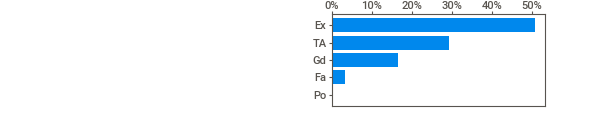
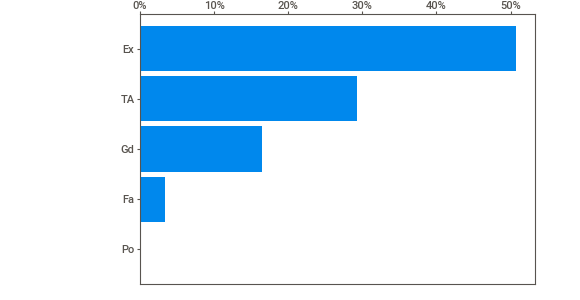
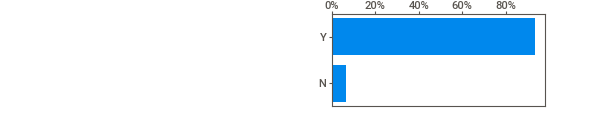
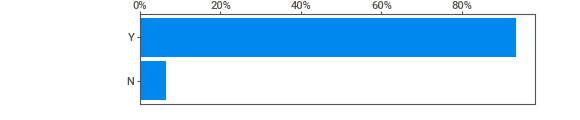
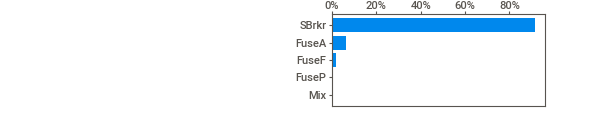
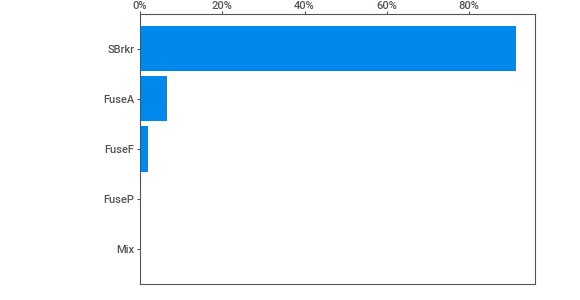
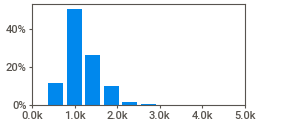
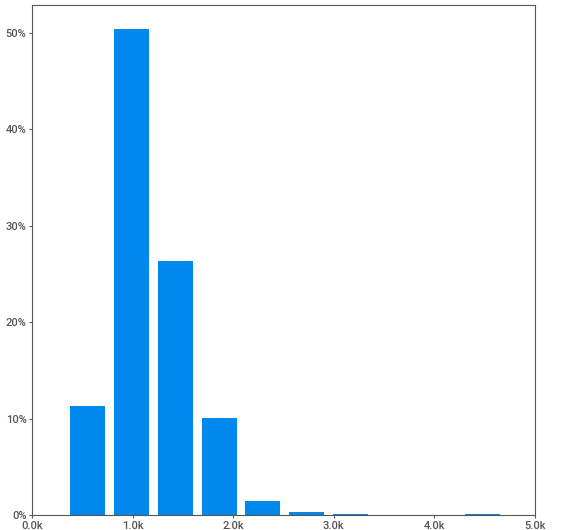
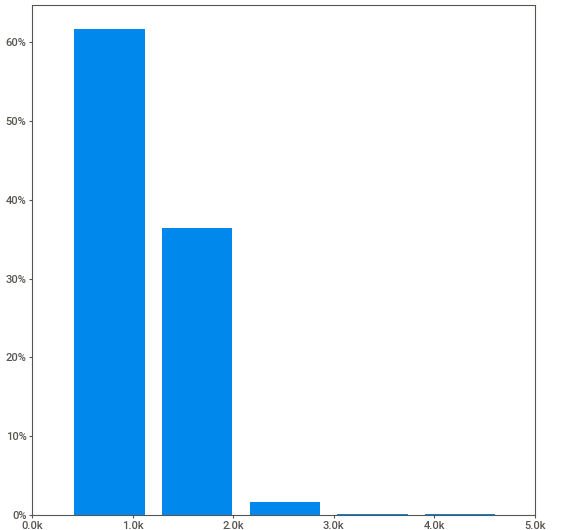
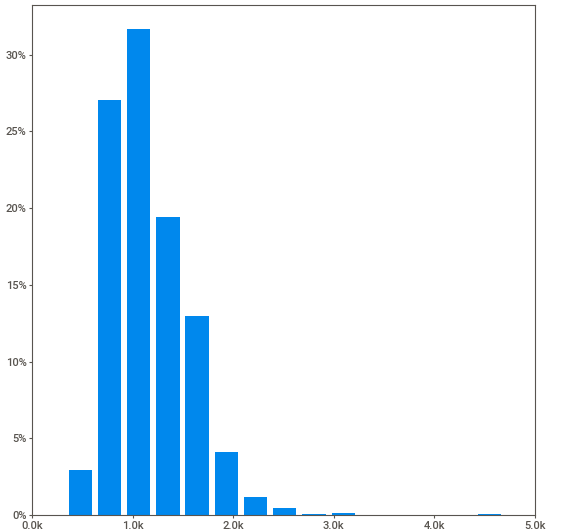
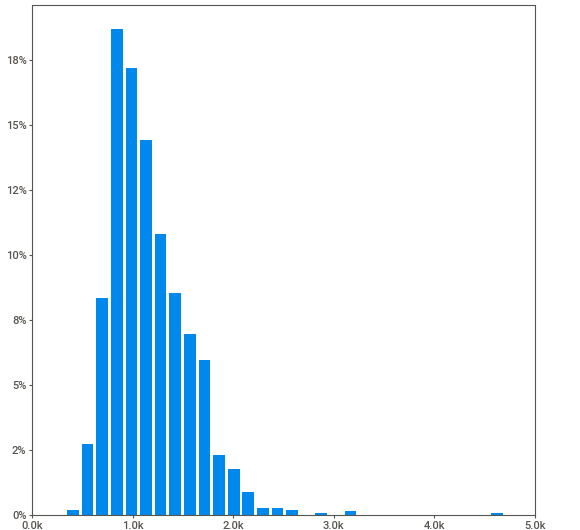
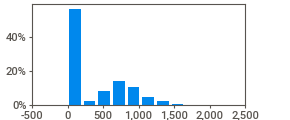
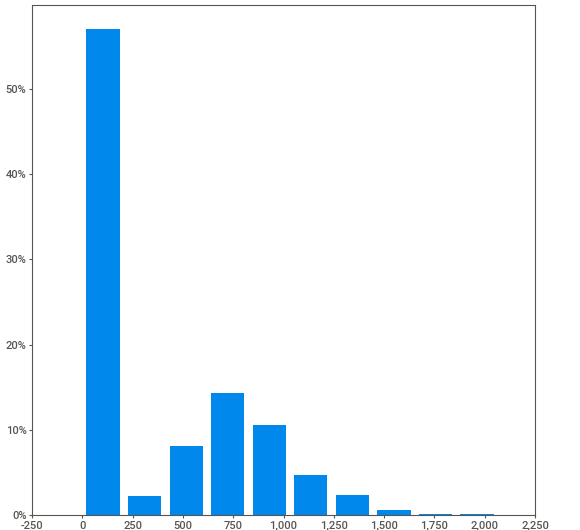
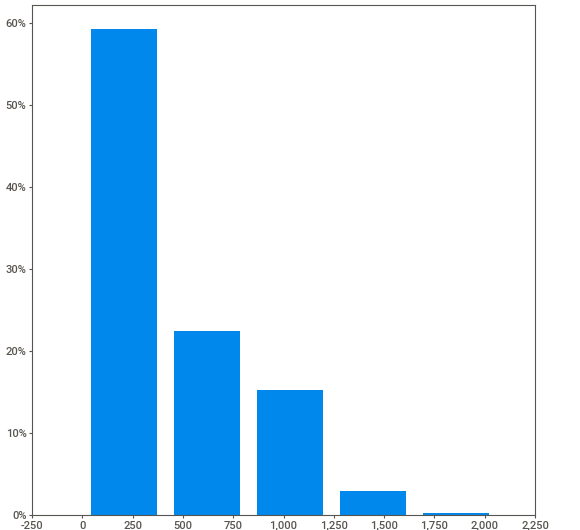
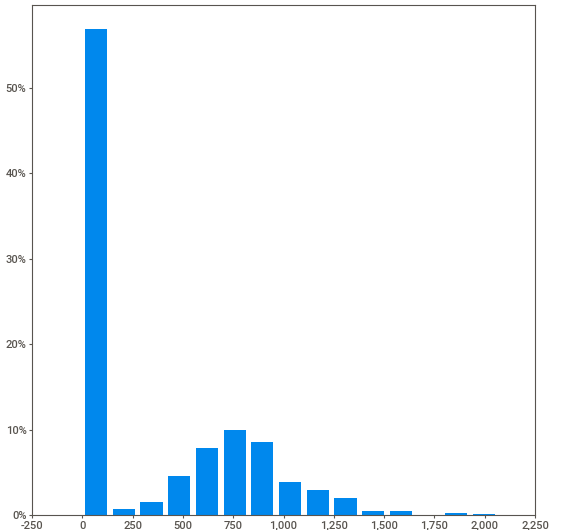
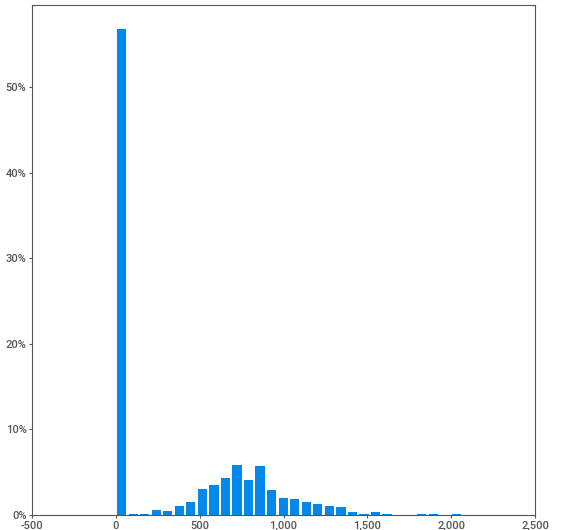
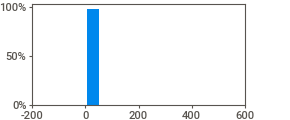
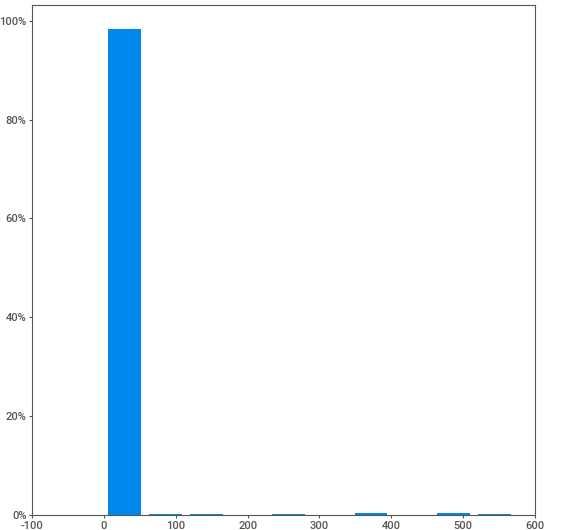
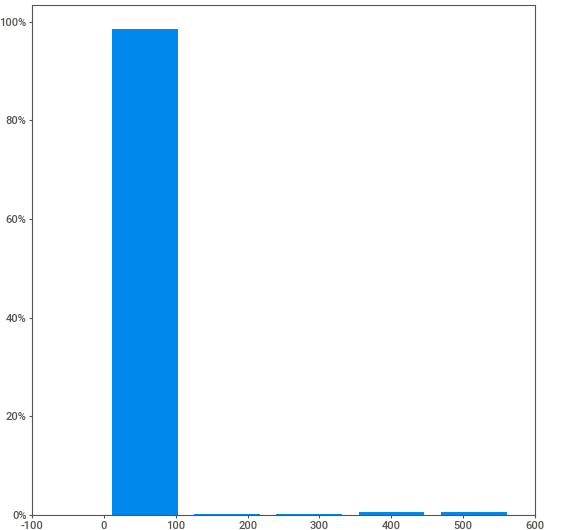
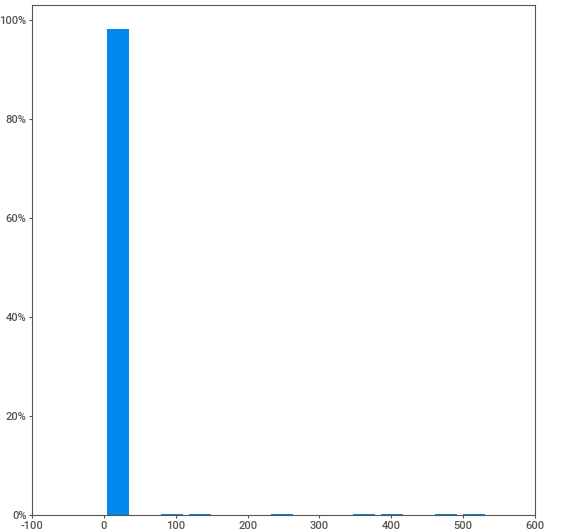
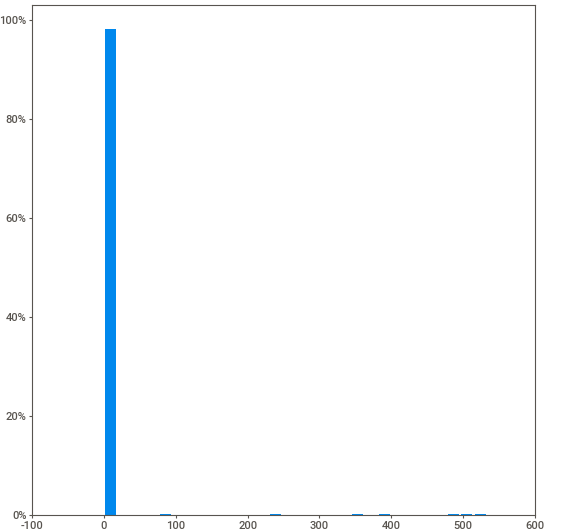
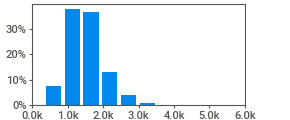
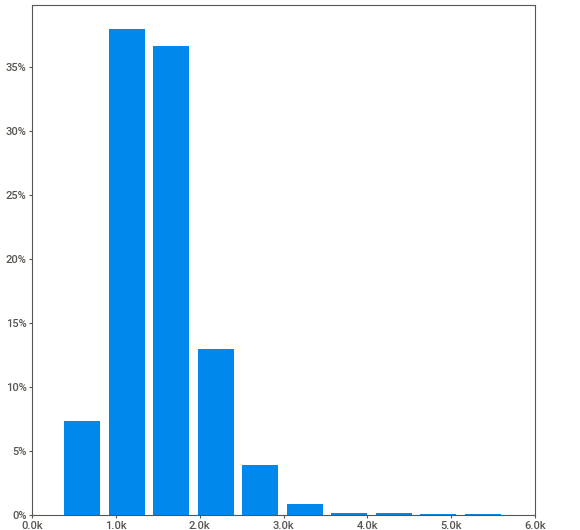
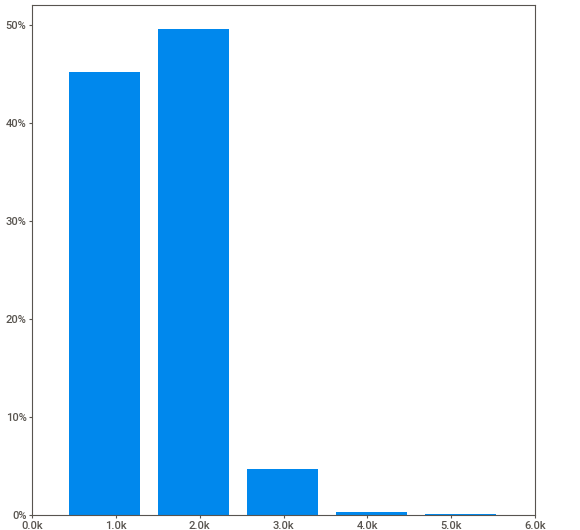
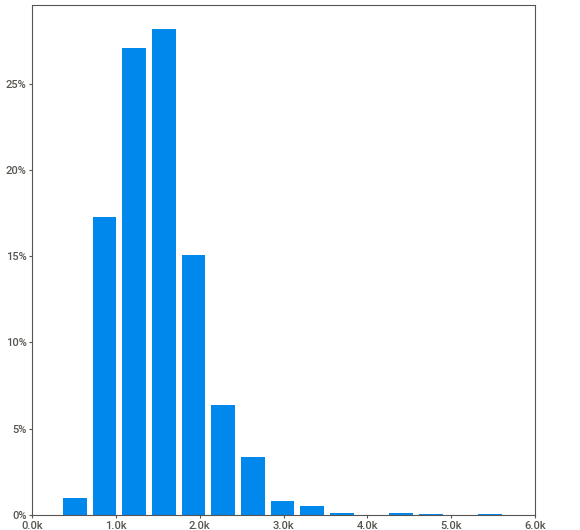
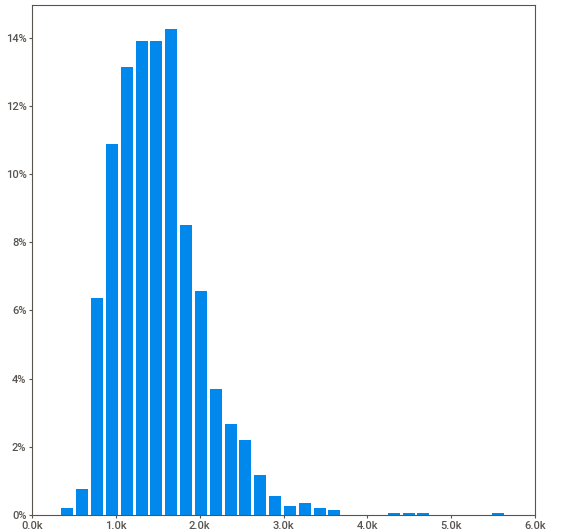
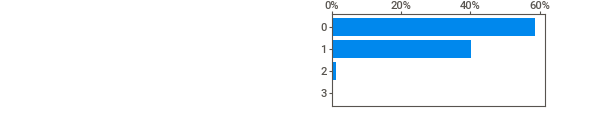
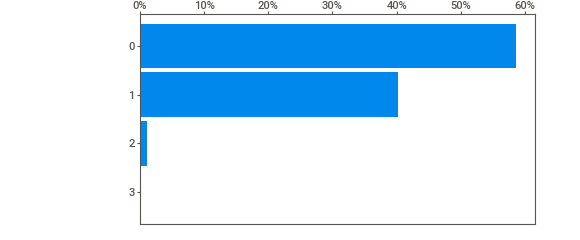
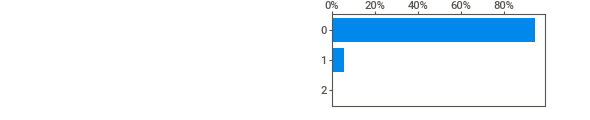
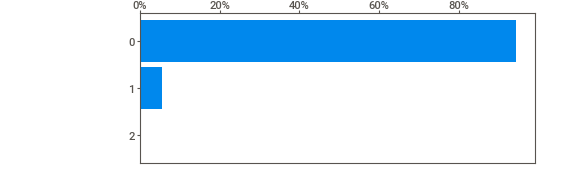
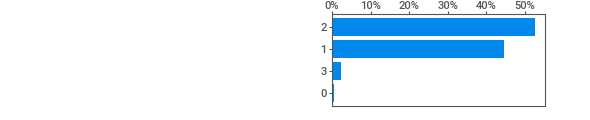
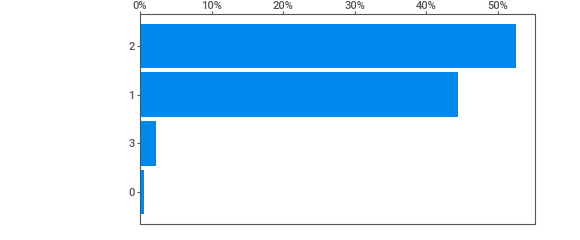
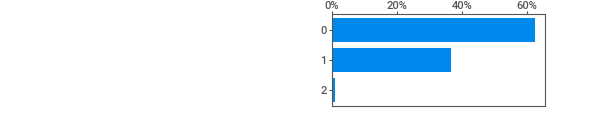
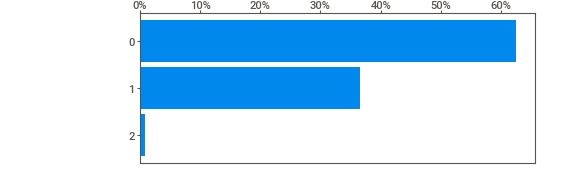
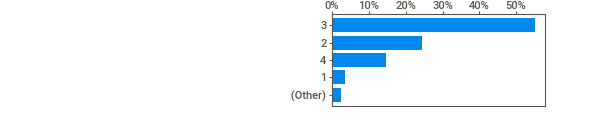
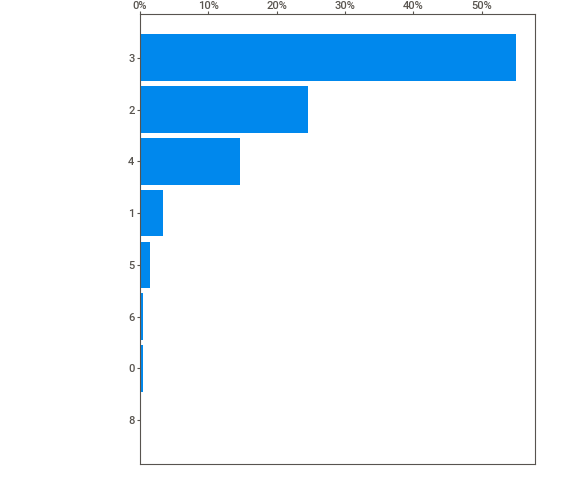
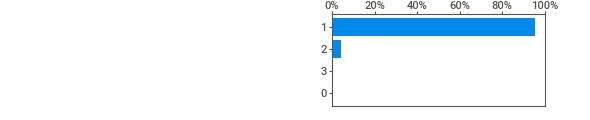
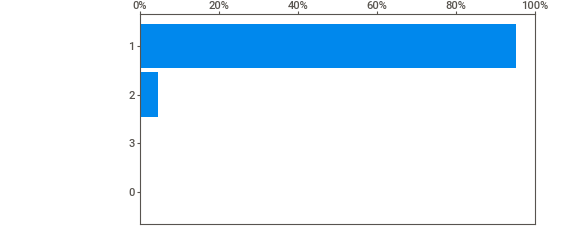
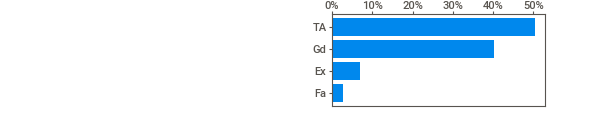
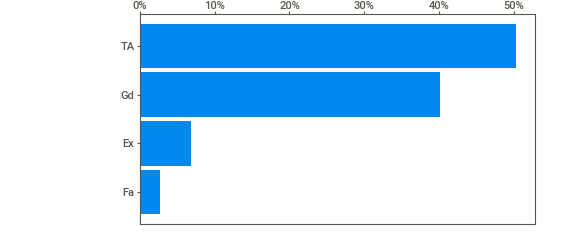
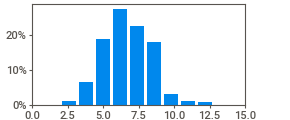
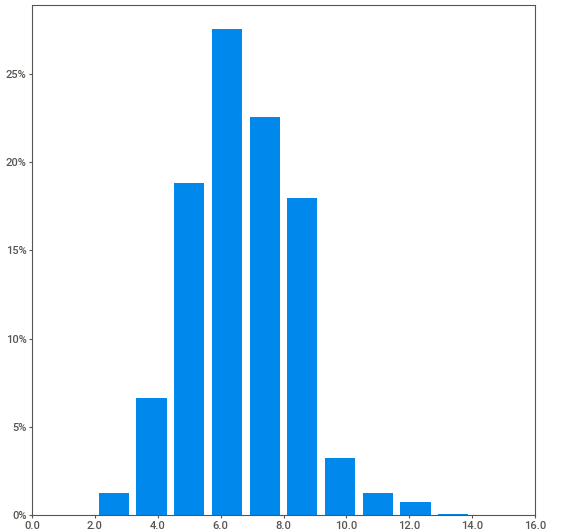
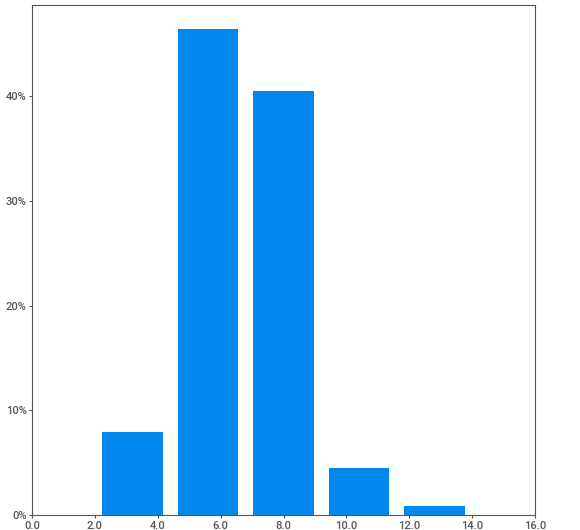
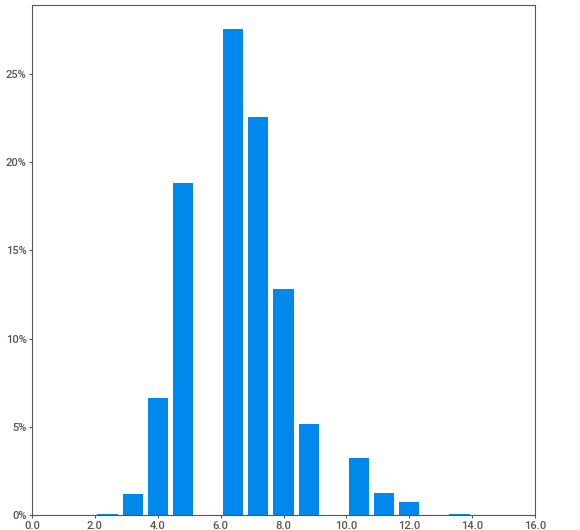
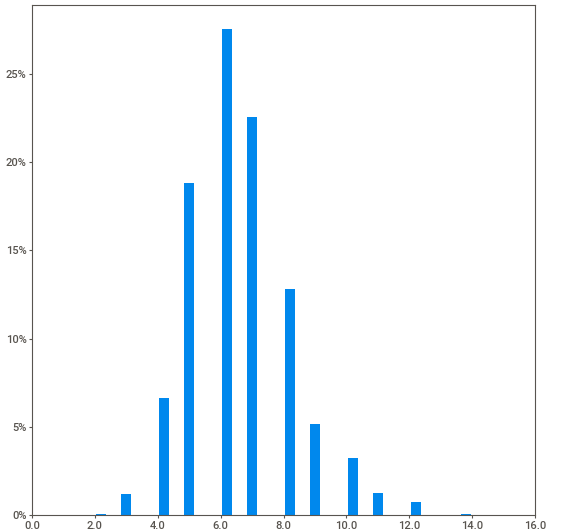
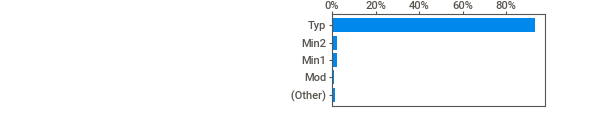
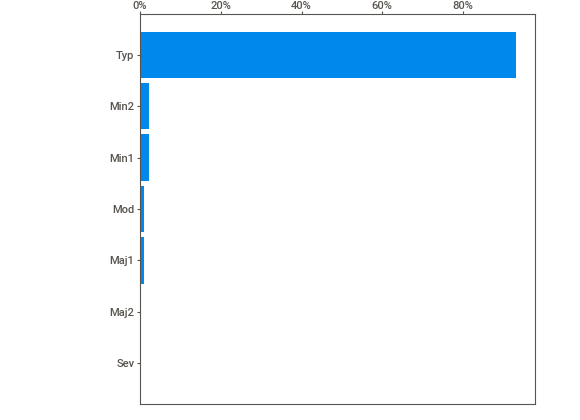
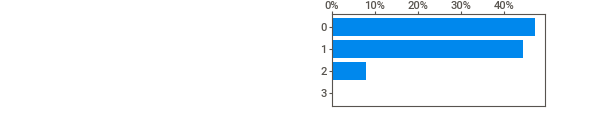
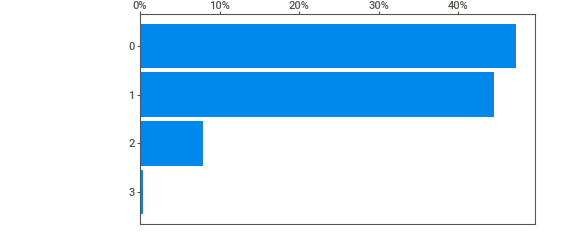
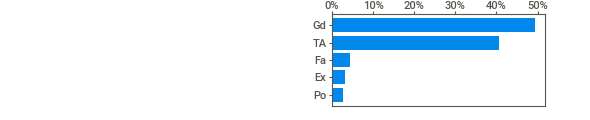
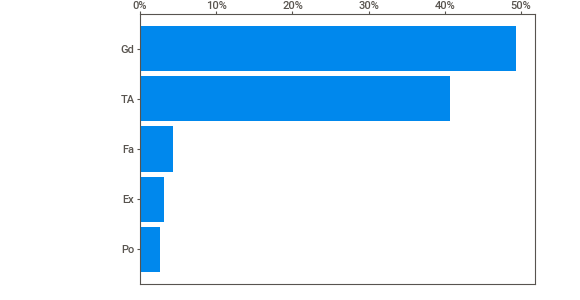
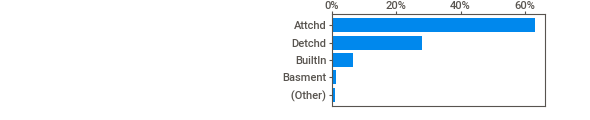
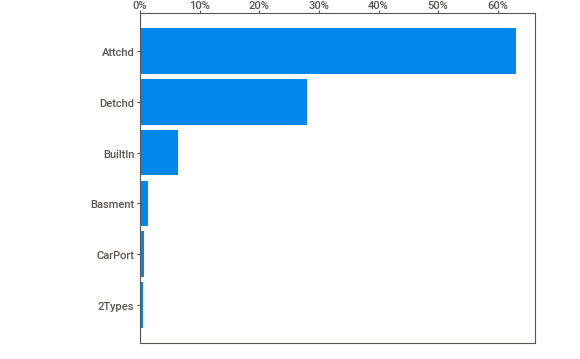
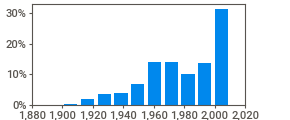
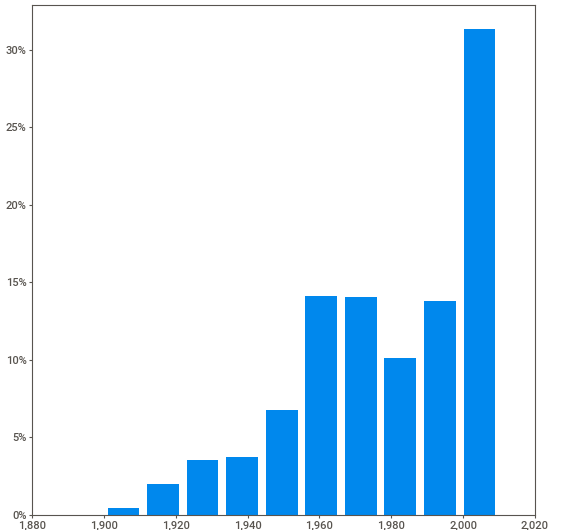
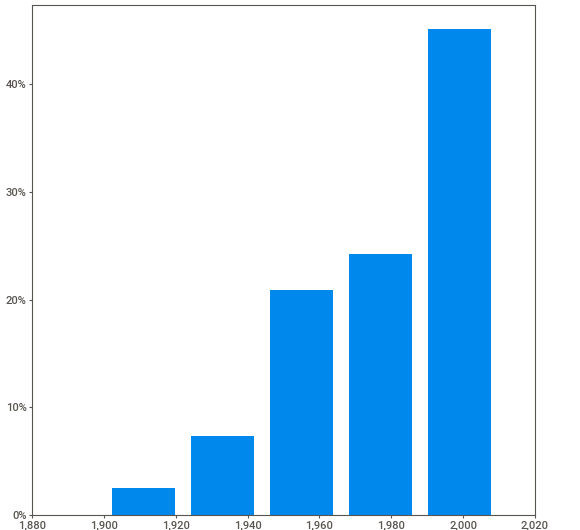
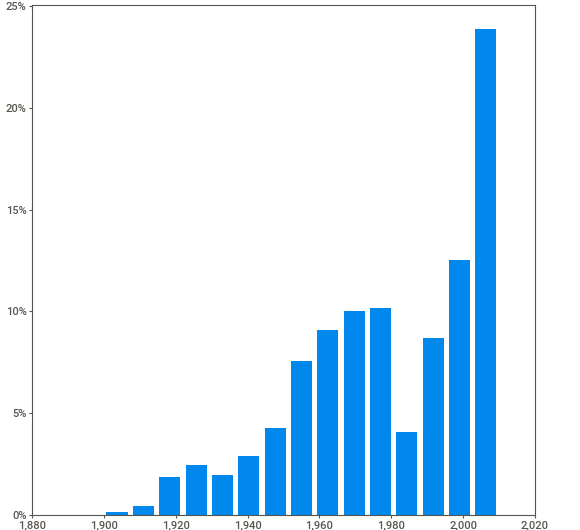
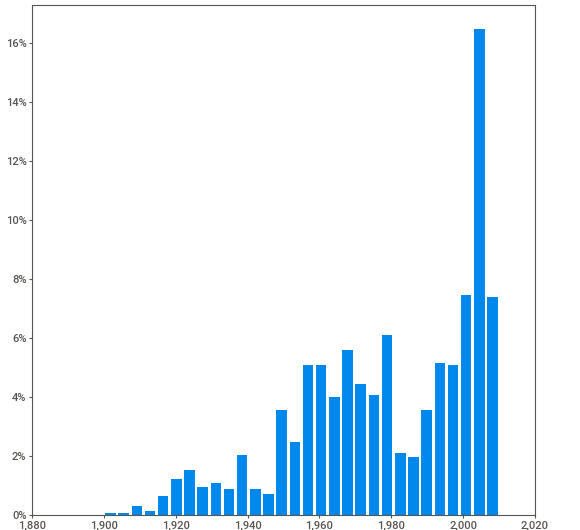
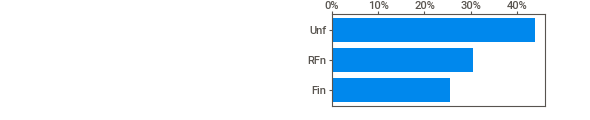
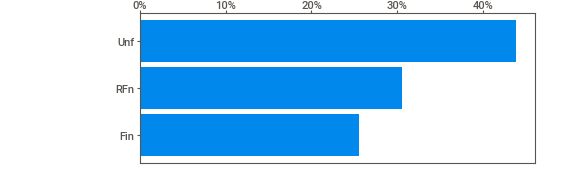
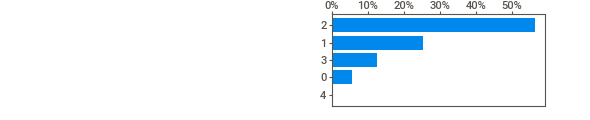
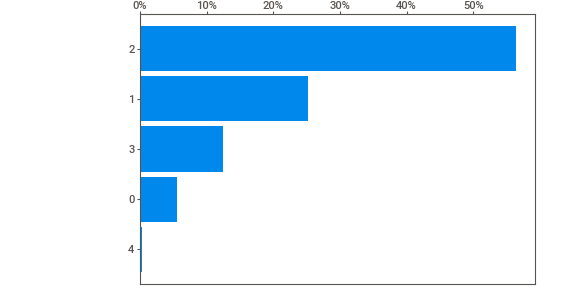
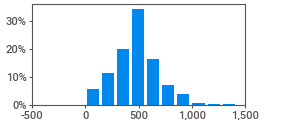
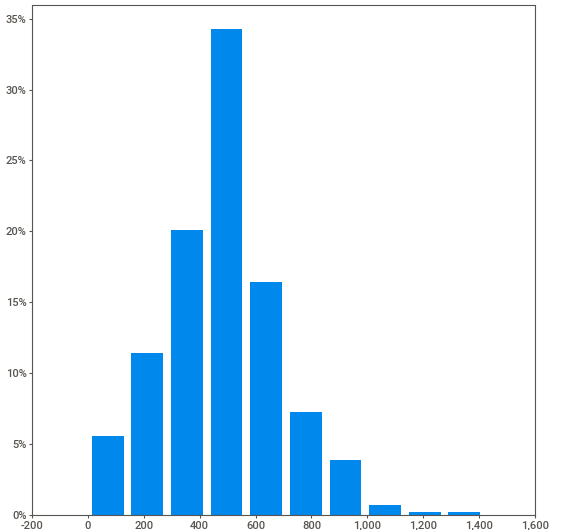
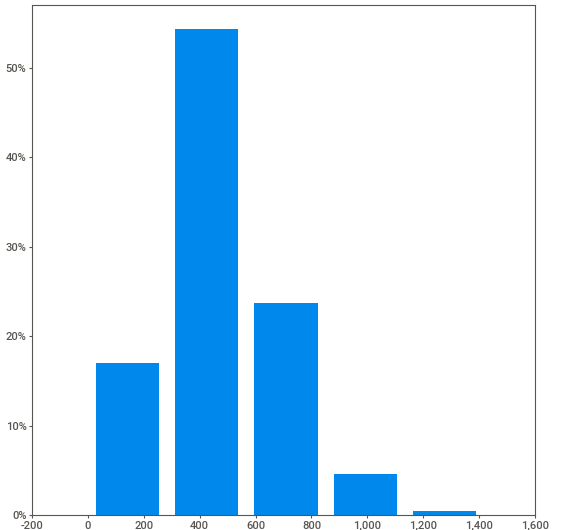
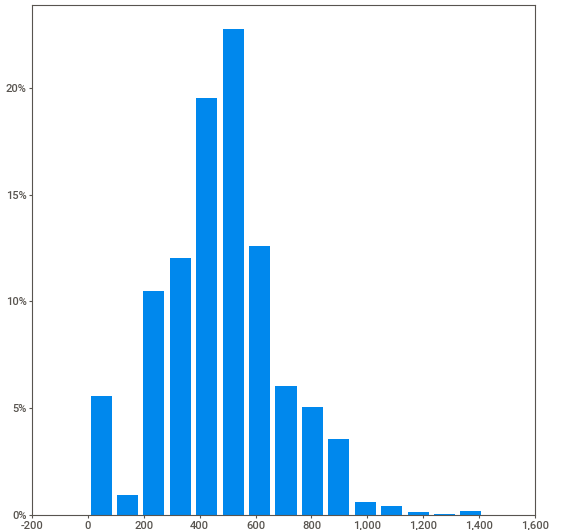
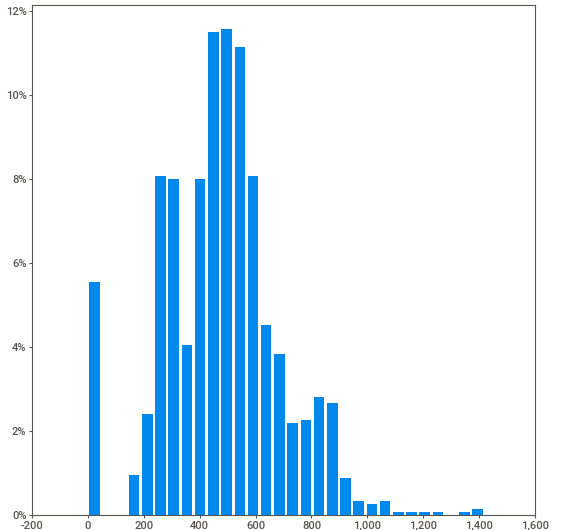
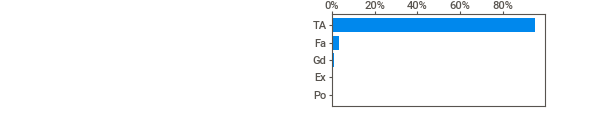
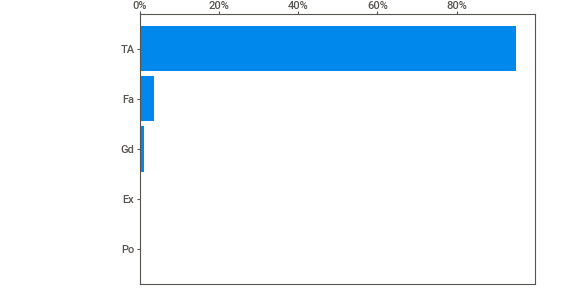
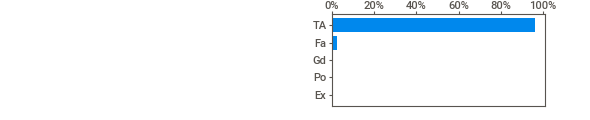
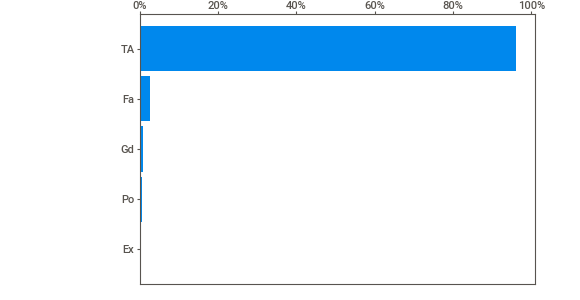
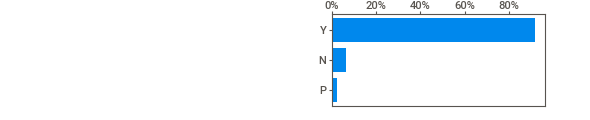
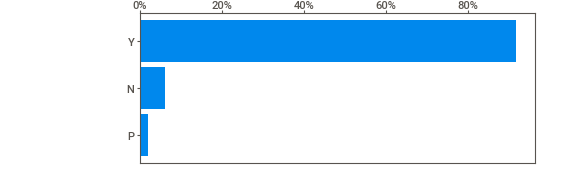
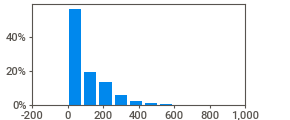
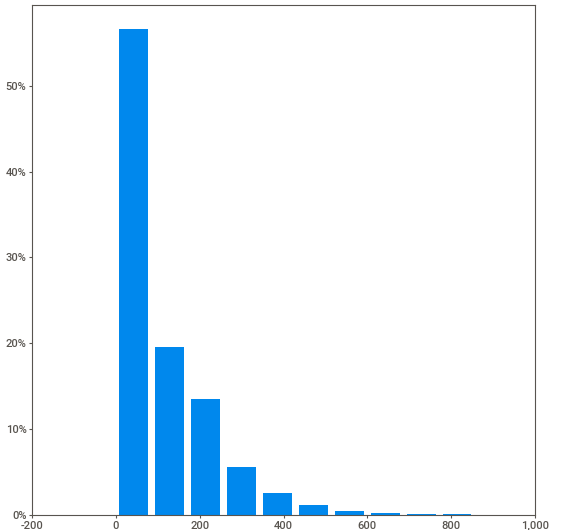
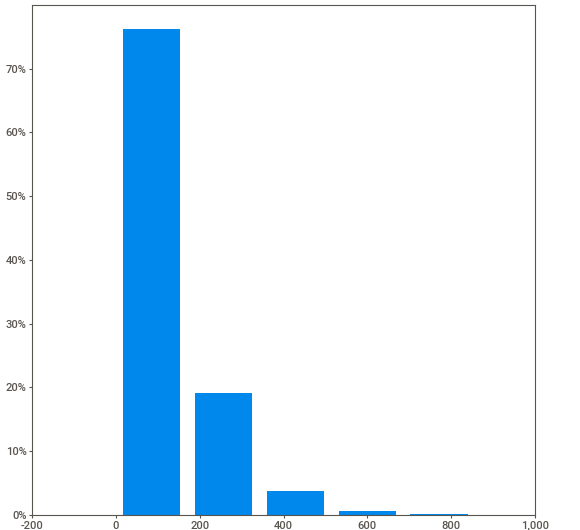
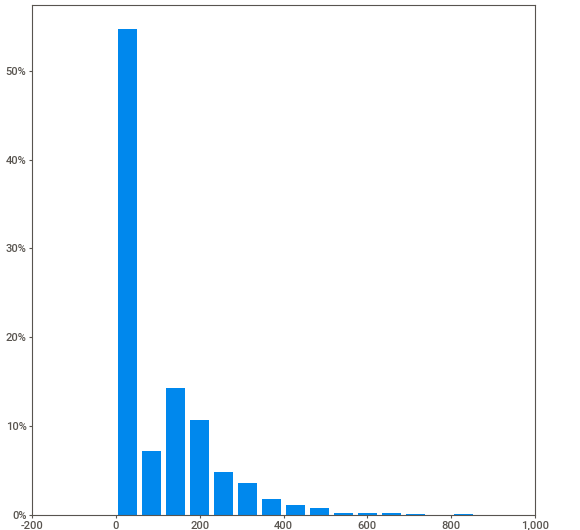
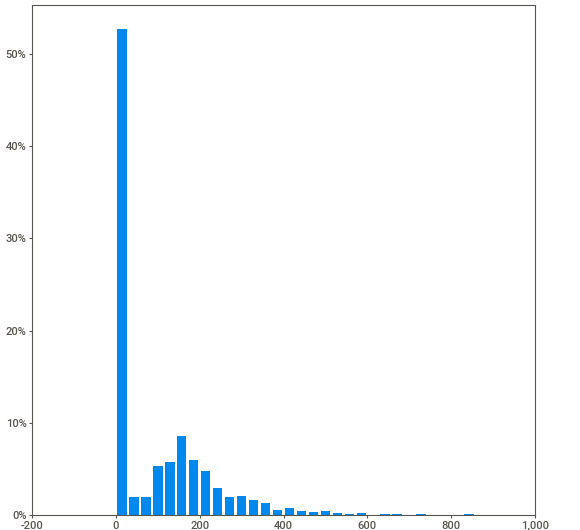
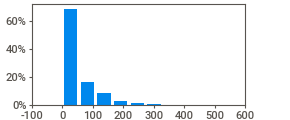
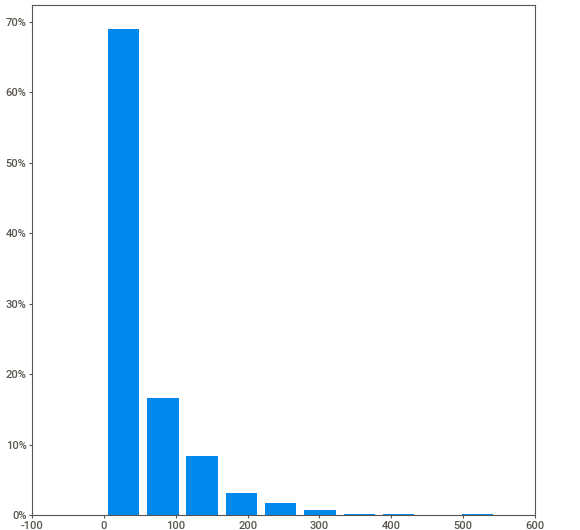
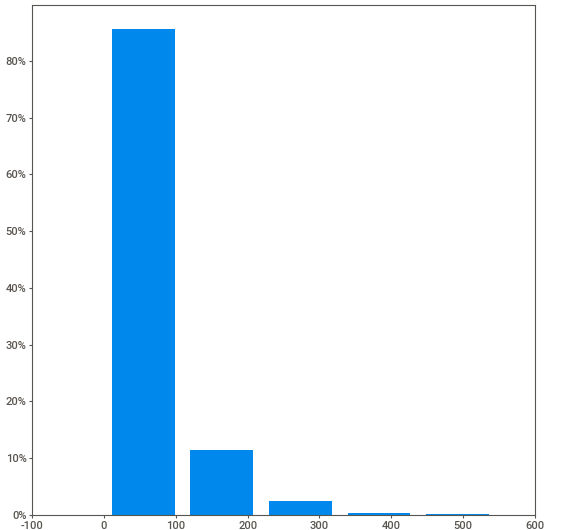
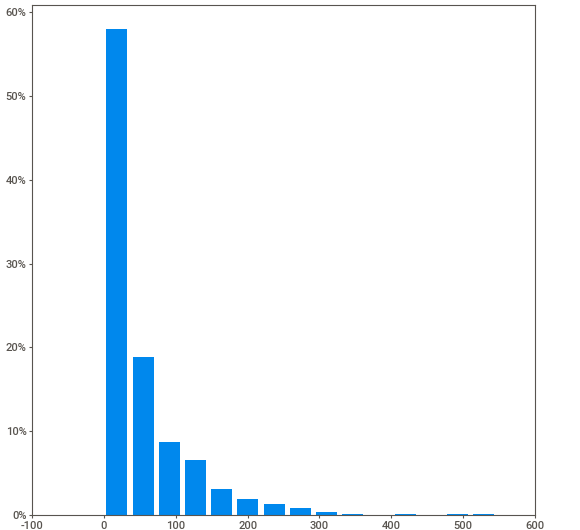
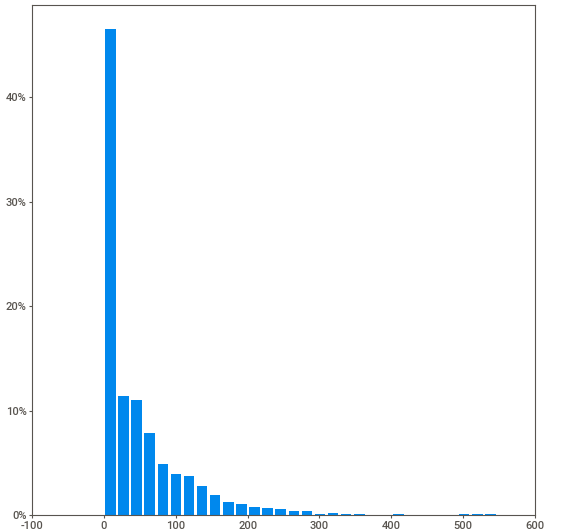
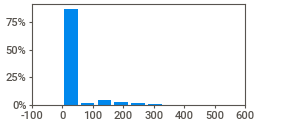
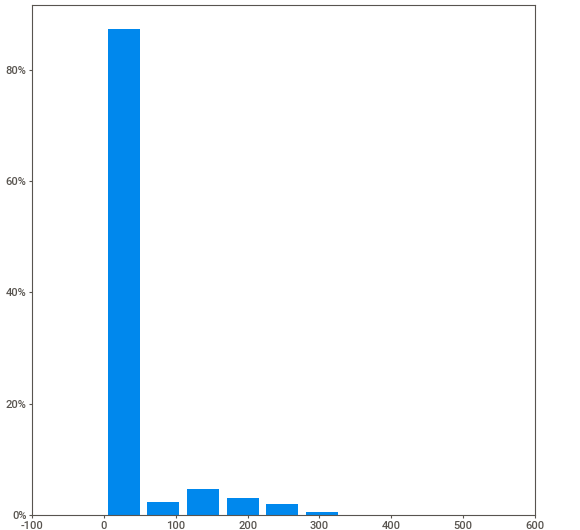
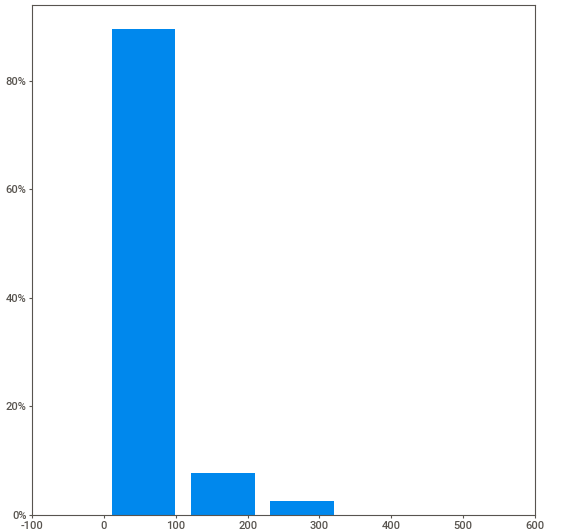
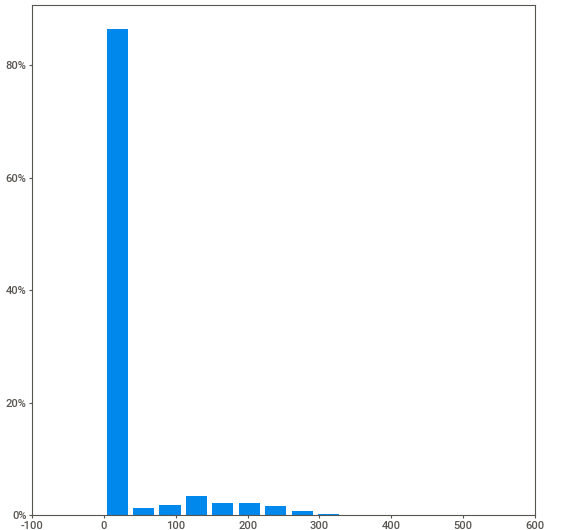
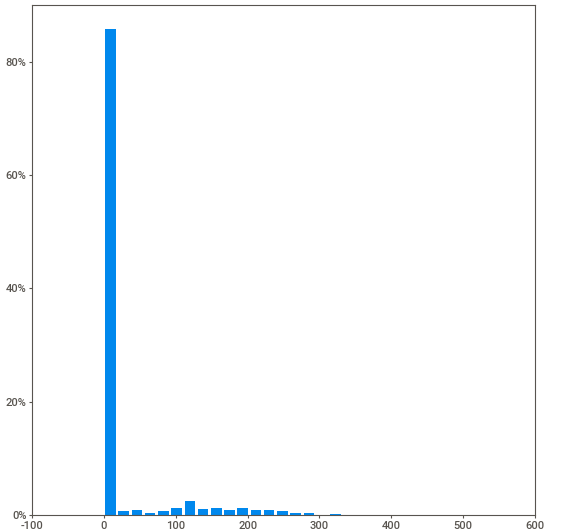
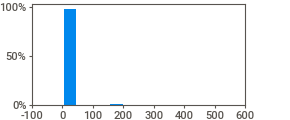
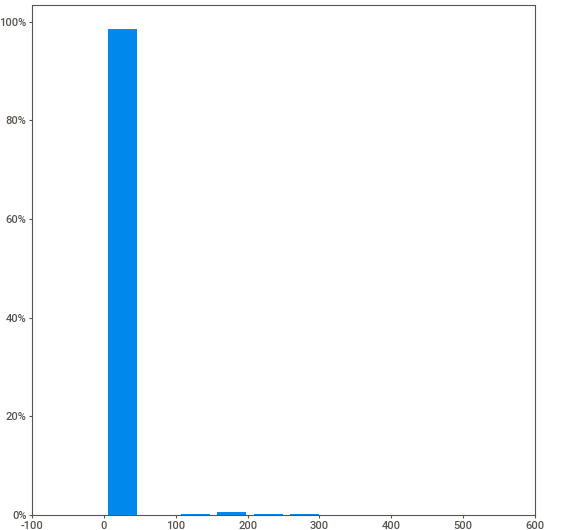
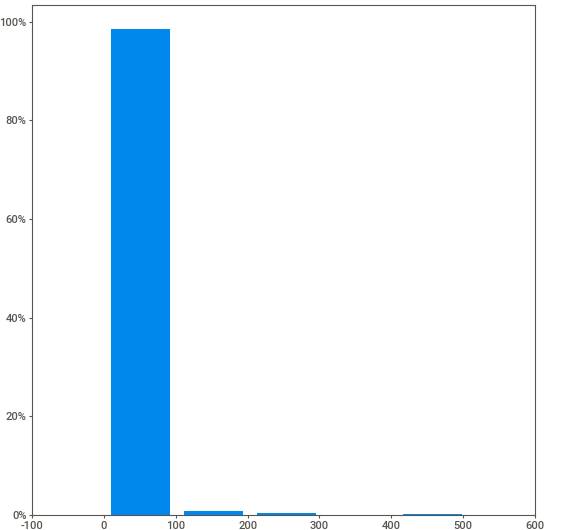
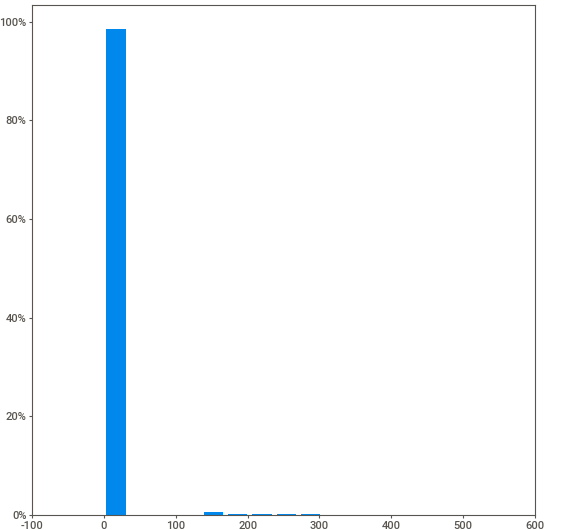
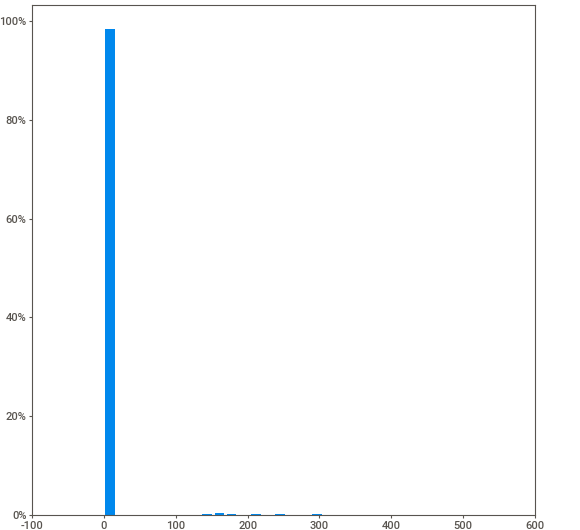
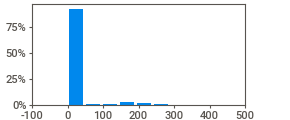
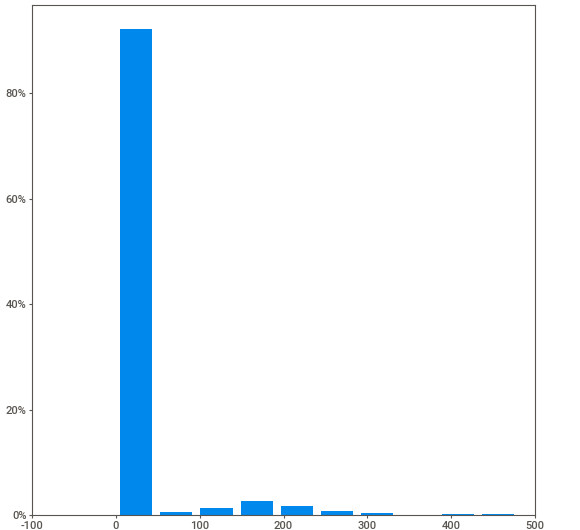
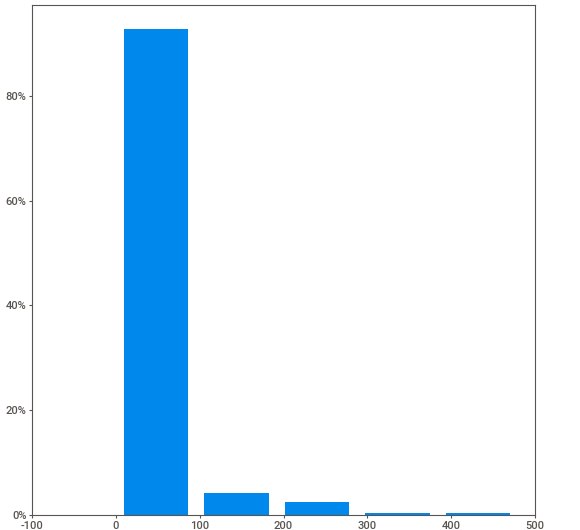
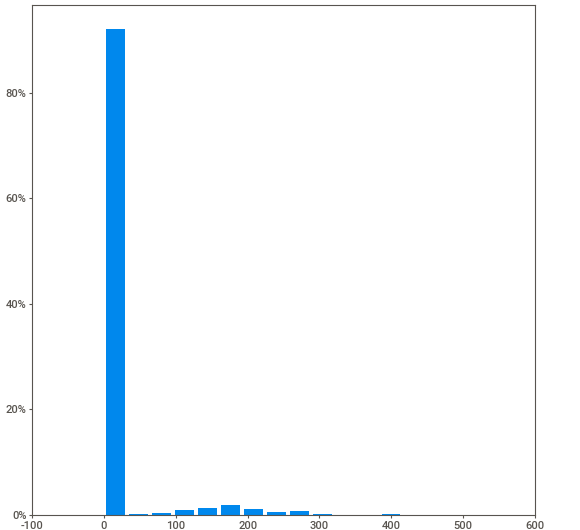
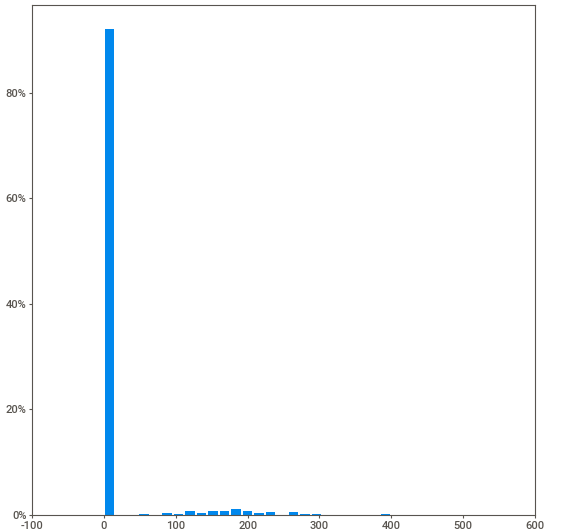
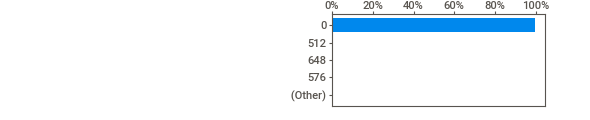
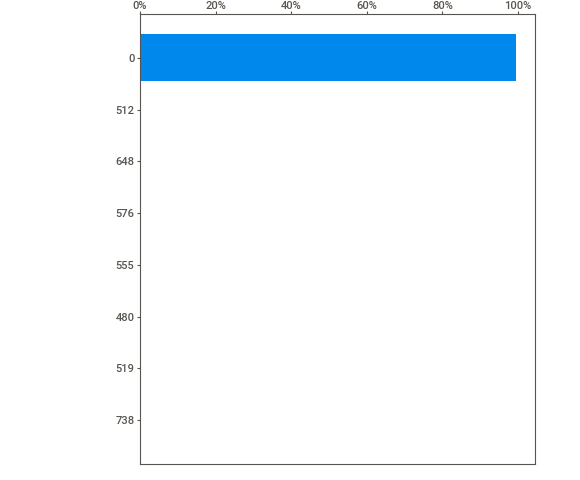
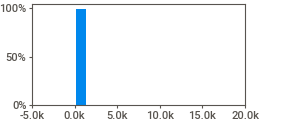
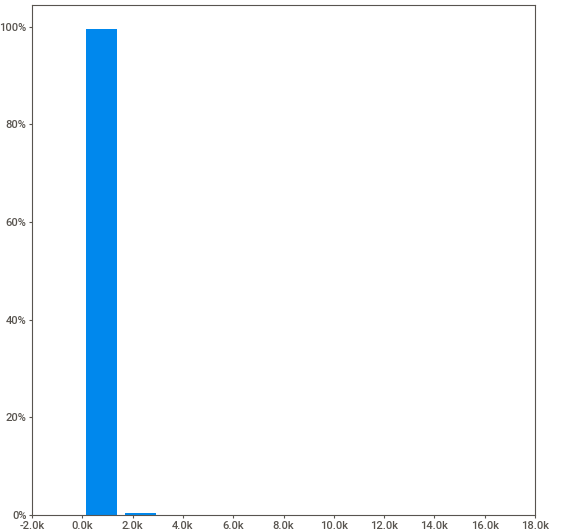
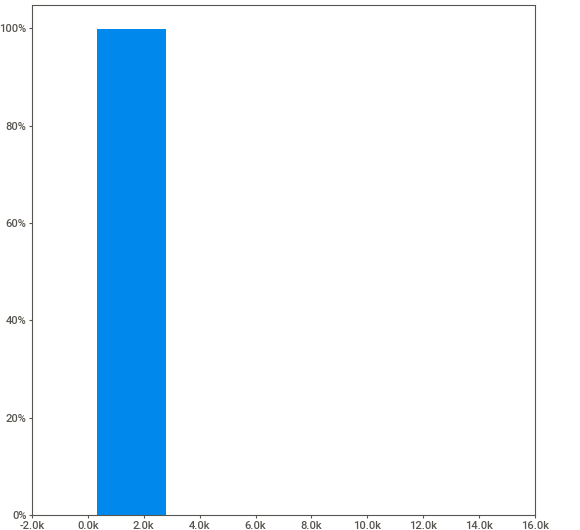
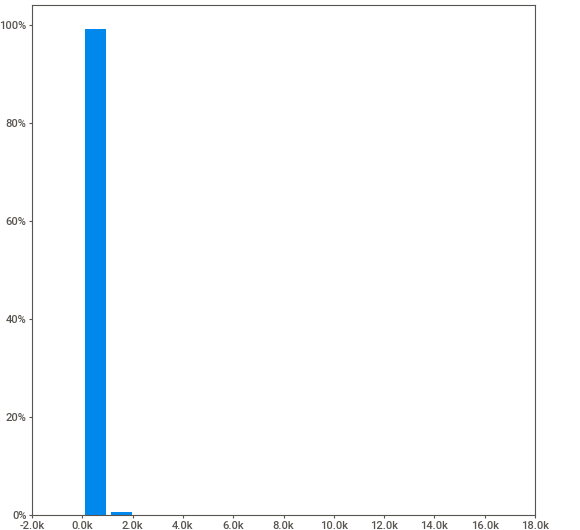
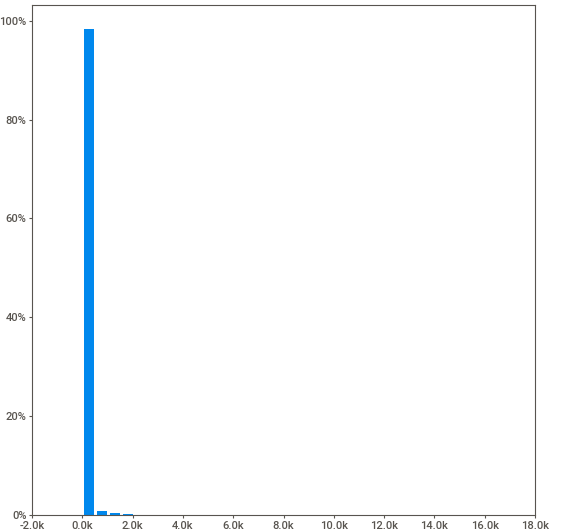
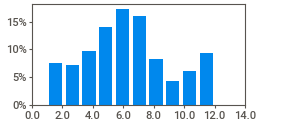
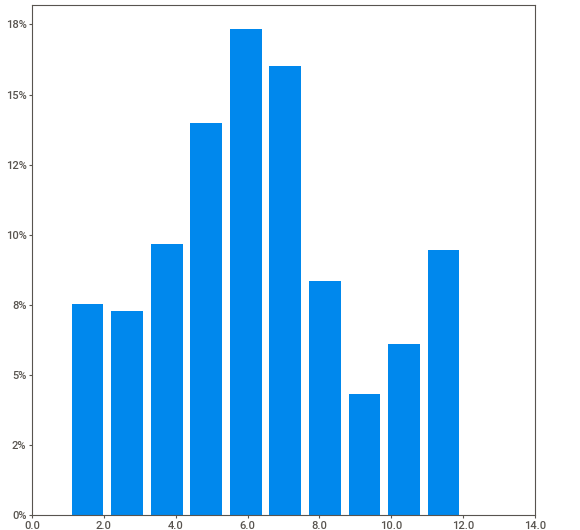
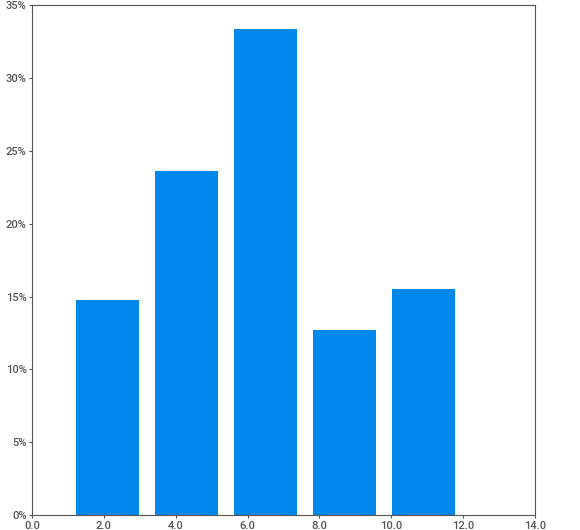
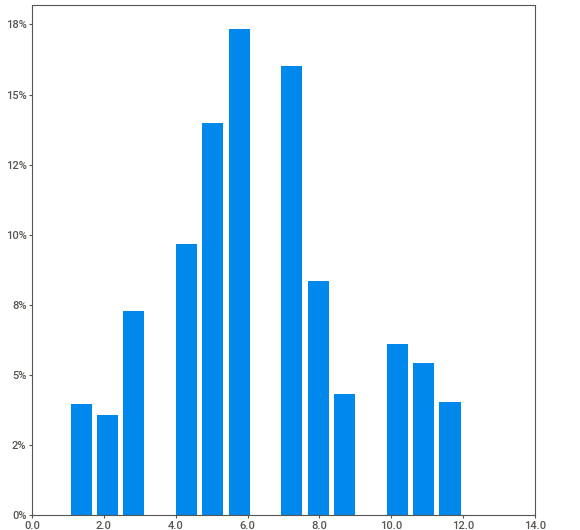
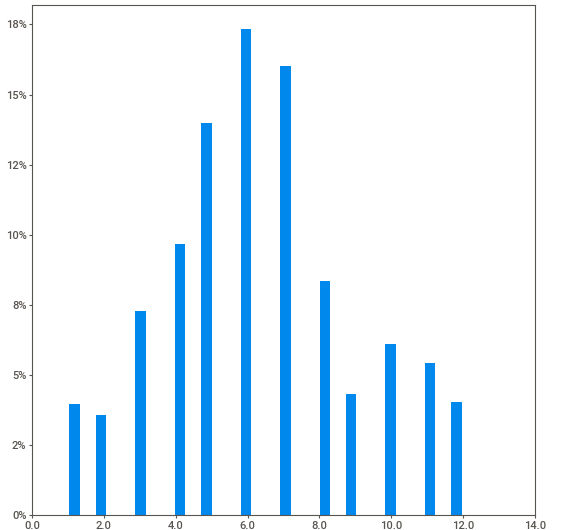
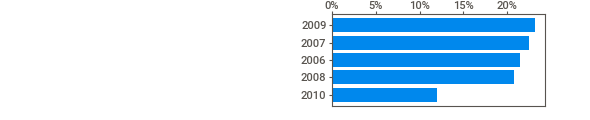
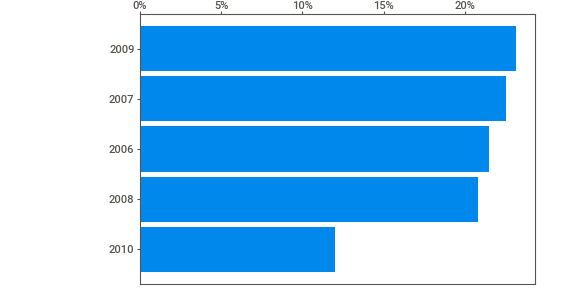
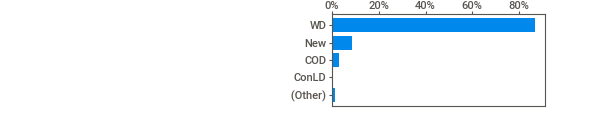
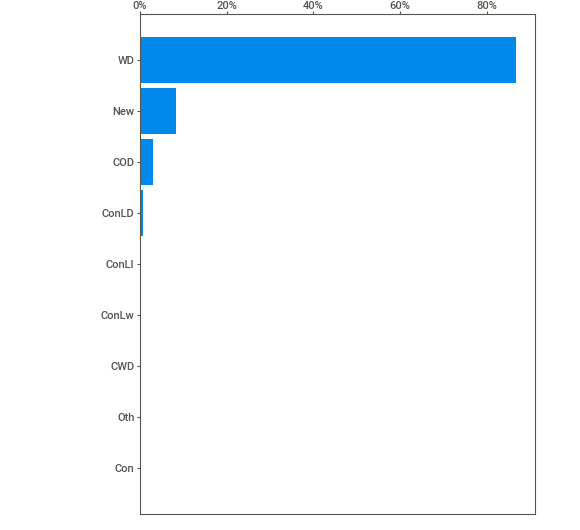
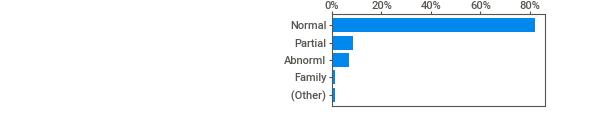
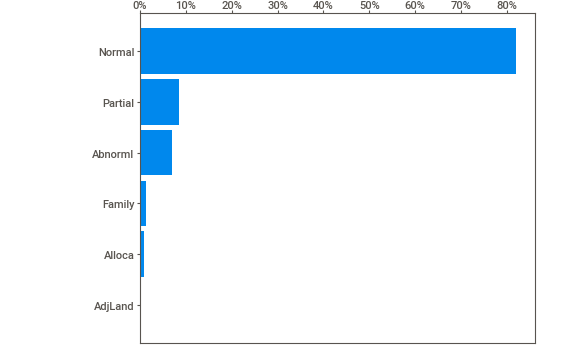
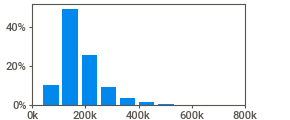
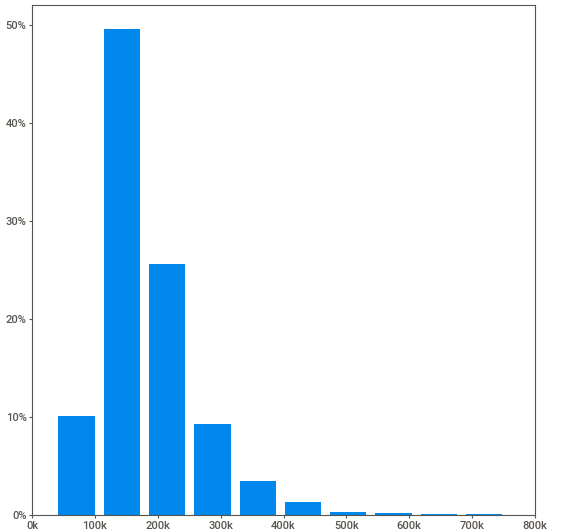
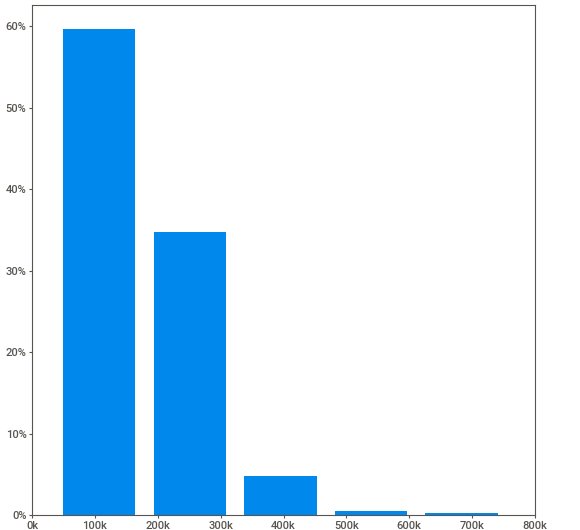
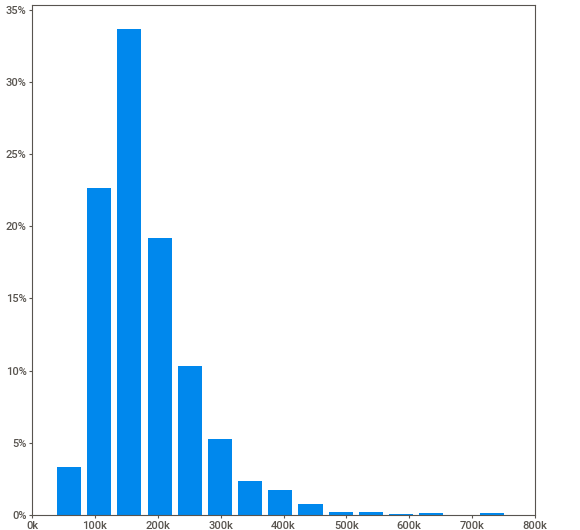
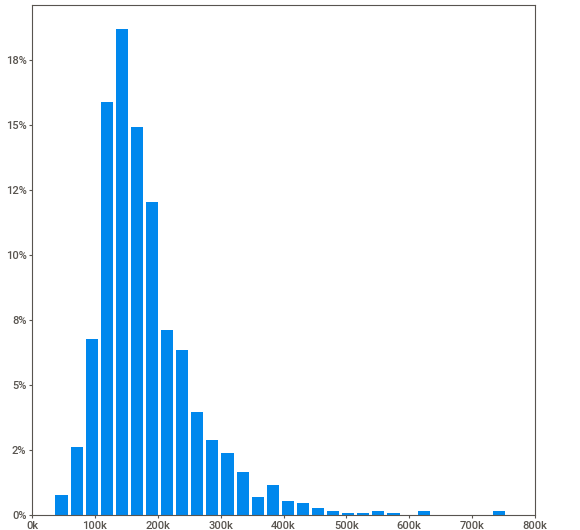
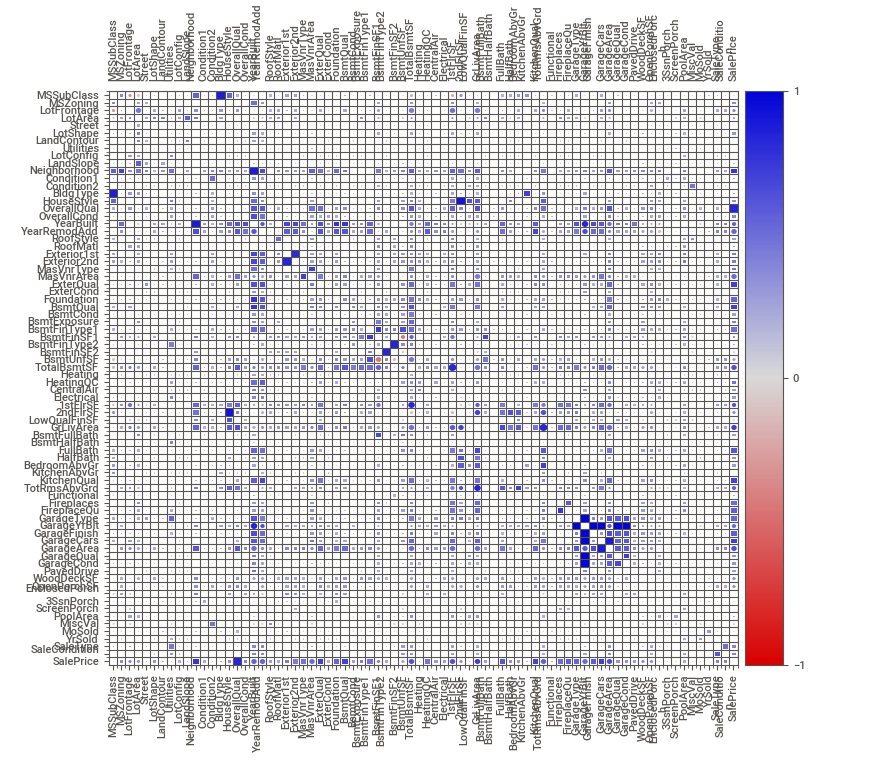
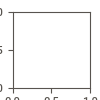

In [ ]:
# import sweetviz and show report on train
import sweetviz as sw

train_report = sw.analyze(train)
train_report.show_notebook(layout='vertical')

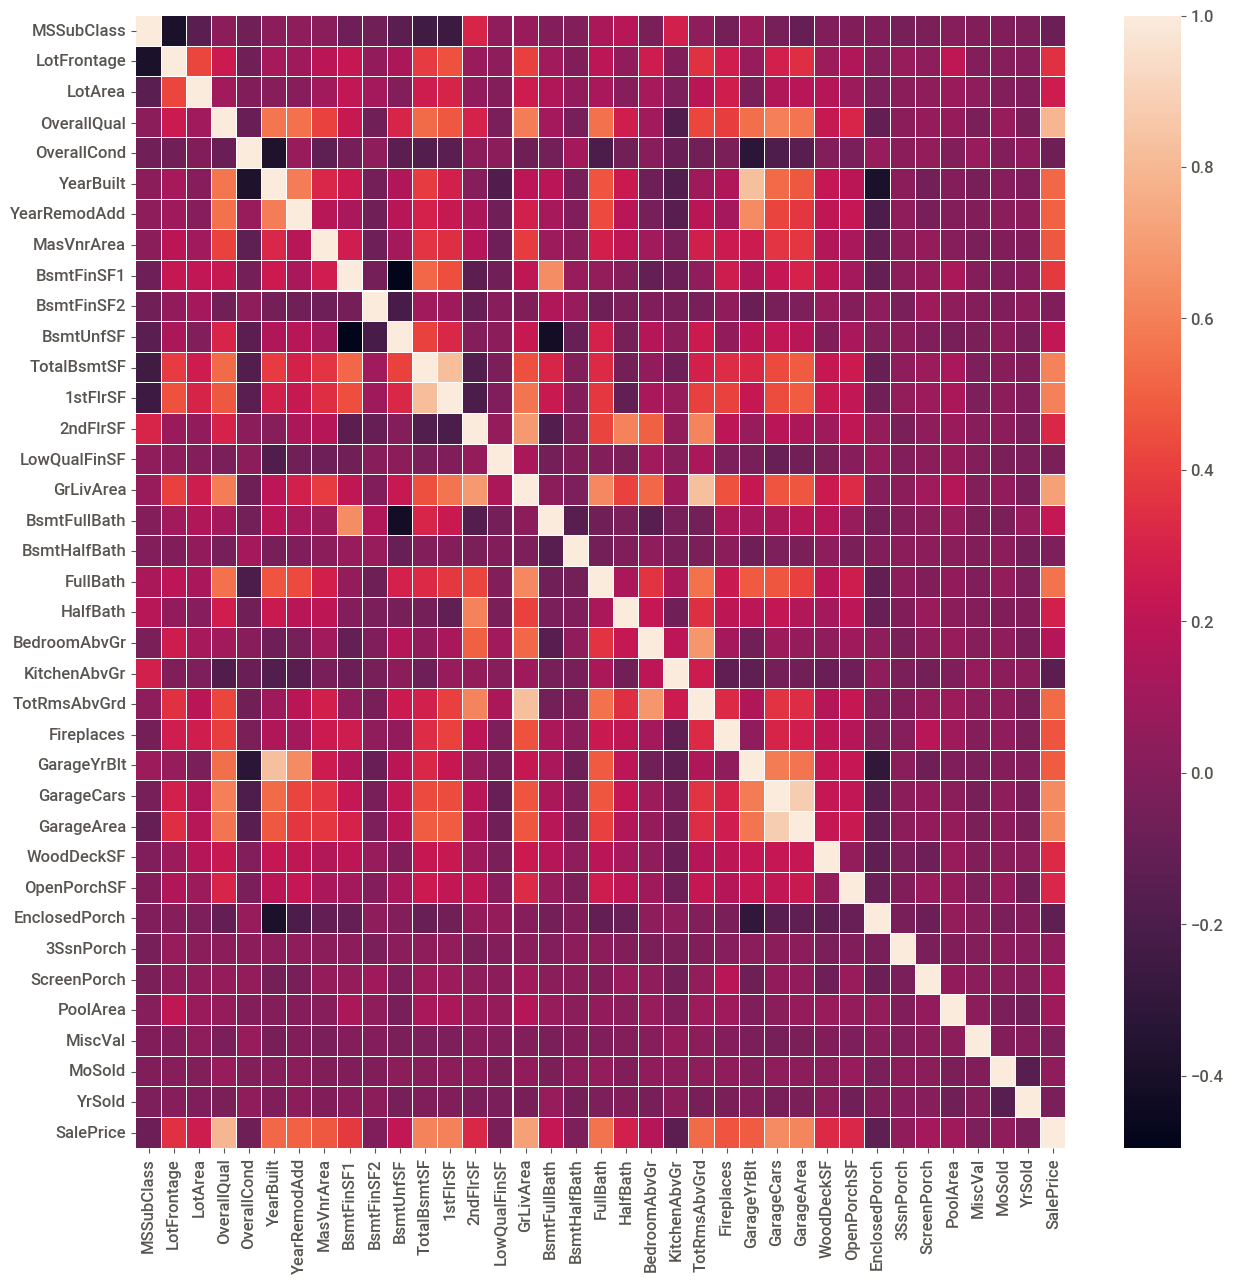

In [ ]:
corr = train.corr()
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.figure(figsize=(15, 15))
sns.heatmap(corr, linewidths=.005)
plt.show()

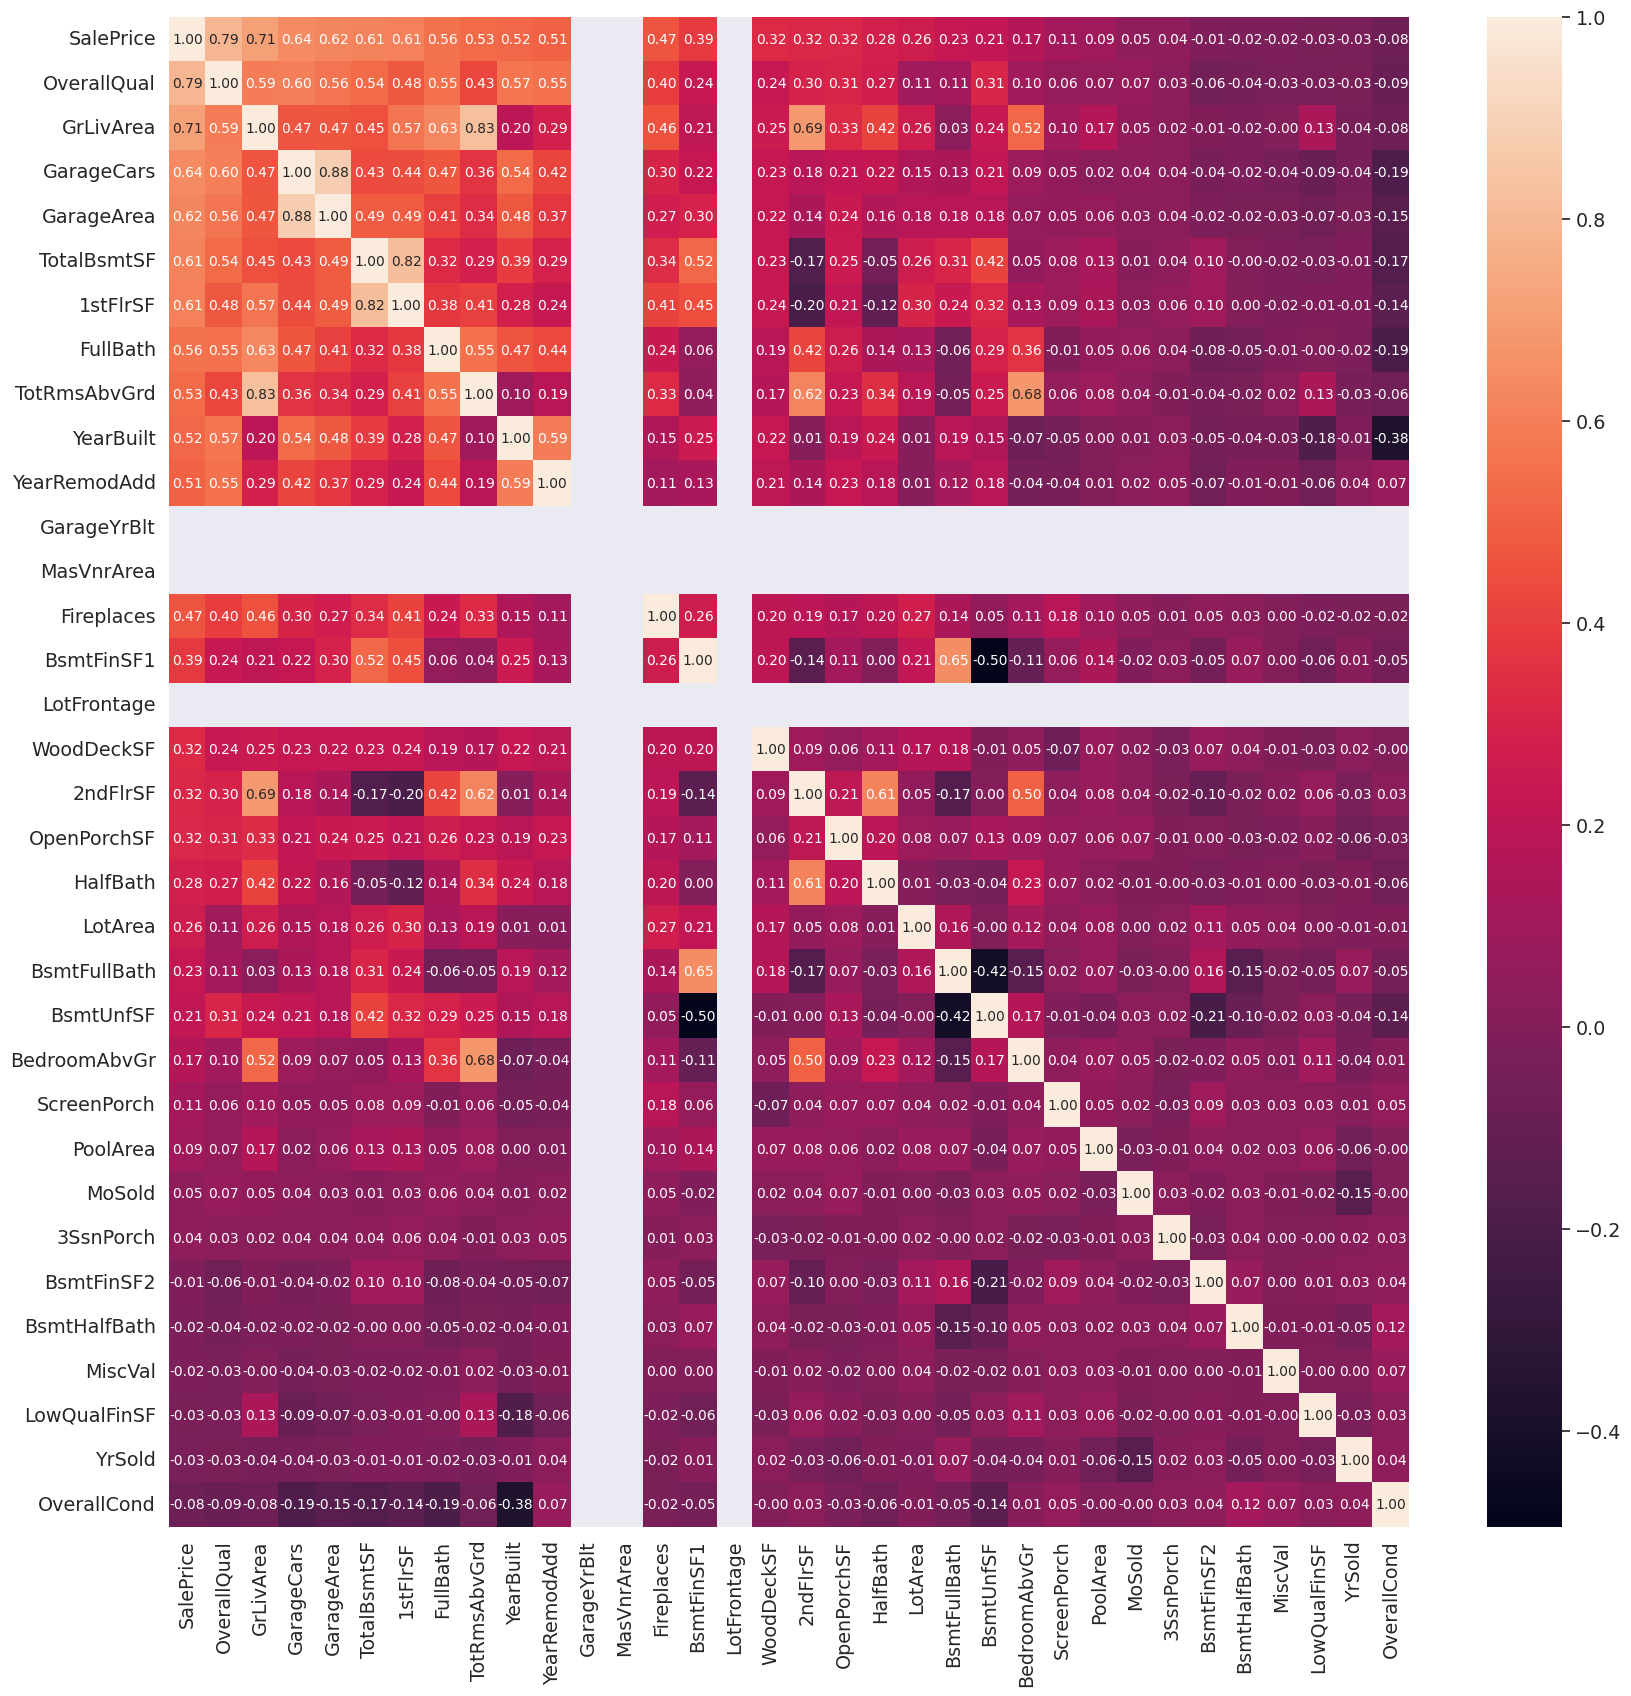

In [ ]:
#saleprice correlation matrix

k = 34 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond'],
      dtype='object')

In [ ]:
# count empty values in each column
def count_empty_values_in_each_column(df):
  numerical_cols = []
  for col in df.columns:
      value_missing = np.mean(df[col].isnull())
      if value_missing > 0:
        if  df[col].dtype == 'float64':
          numerical_cols.append(col)
        print('{} - {:.2f}% ;{}'.format(col, value_missing*100,df[col].dtype))
  return numerical_cols

count_empty_values_in_each_column(train)

LotFrontage - 17.74% ;float64
MasVnrType - 0.55% ;object
MasVnrArea - 0.55% ;float64
BsmtQual - 2.53% ;object
BsmtCond - 2.53% ;object
BsmtExposure - 2.60% ;object
BsmtFinType1 - 2.53% ;object
BsmtFinType2 - 2.60% ;object
Electrical - 0.07% ;object
FireplaceQu - 47.26% ;object
GarageType - 5.55% ;object
GarageYrBlt - 5.55% ;float64
GarageFinish - 5.55% ;object
GarageQual - 5.55% ;object
GarageCond - 5.55% ;object


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# fill empty values by median value for each column in the dataframe
def fill_na_median(df, column_names):
  for column_name in column_names:
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

# fill empty values by mean value for each column in the dataframe
def fill_na_mean(df, column_names):
  for column_name in column_names:
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

# fill empty values by mode value for each column in the dataframe
def fill_na_mode(df, column_names):
  for column_name in column_names:
    df[column_name].fillna(df[column_name].mode()[0], inplace=True)

In [ ]:
# import make_subplots and create pie charts subplots of the categorical features
from plotly.subplots import make_subplots

def create_pie_chart_subplot_of_count(df, columns_names):
    rows = int(np.ceil(np.sqrt(len(columns_names))))
    cols = int(np.ceil(len(columns_names)/rows))
    fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "domain"} for i in range(cols)] for j in range(rows)])
    for i, column_name in enumerate(columns_names):
        df_not_null = df[~df[column_name].isnull()]
        fig.add_trace(go.Pie(labels=df_not_null.groupby([column_name]).size().reset_index(name='count')[column_name], 
                             values=df_not_null.groupby([column_name]).size().reset_index(name='count')['count'], 
                             name=column_name), 
                      (i)//cols+1, (i)%cols+1)
    fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
    fig.show()

In [ ]:
count_empty_values_in_each_column(train)

LotFrontage - 17.74% ;float64
MasVnrType - 0.55% ;object
MasVnrArea - 0.55% ;float64
BsmtQual - 2.53% ;object
BsmtCond - 2.53% ;object
BsmtExposure - 2.60% ;object
BsmtFinType1 - 2.53% ;object
BsmtFinType2 - 2.60% ;object
Electrical - 0.07% ;object
FireplaceQu - 47.26% ;object
GarageType - 5.55% ;object
GarageYrBlt - 5.55% ;float64
GarageFinish - 5.55% ;object
GarageQual - 5.55% ;object
GarageCond - 5.55% ;object


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
train['LotFrontage'] = train.groupby(['Neighborhood', 'Street'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
train.MasVnrArea.fillna(train.MasVnrArea.median(), inplace=True)
train.GarageYrBlt.fillna(train.MasVnrArea.median(), inplace = True)
train.BsmtFinType1.fillna("NB", inplace=True)
train.BsmtFinType2.fillna("NB", inplace=True)
train.BsmtExposure.fillna("NB", inplace=True)
train.BsmtQual.fillna("NB", inplace=True)
train.BsmtCond.fillna("No", inplace=True)
train.GarageCond.fillna("No", inplace = True)
train.GarageQual.fillna("No", inplace = True)
train.GarageFinish.fillna("No", inplace = True)
train.GarageType.fillna("No", inplace = True)
train.FireplaceQu.fillna("No", inplace = True)
train.Electrical.fillna("SBrkr", inplace = True)
train.MasVnrType.fillna("NMV", inplace = True)

In [ ]:
count_empty_values_in_each_column(train)

[]

In [ ]:
# divide the data to features and target
t = train['SalePrice'].copy()
X = train.drop(['SalePrice'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


X


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0       AllPub    Inside       Gtl  ...          61             0         0   
1       AllPub       FR2       Gtl  ...           0             0         0   
2       AllPub    Inside       Gtl  ...          42             0         0   
3       AllPub    Corner       Gtl  ...          35           272         0   
4       AllPub       FR2       Gtl  ...          84             0         0   
...        ...       ...       ...  ...         ...           ...       ...   
1455    AllPub    Inside       Gtl  ...          40             0         0   
1456    AllPub    Inside       Gtl  ...           0             0         0   
1457    AllPub    Inside       Gtl  ...          60             0         0   
1458    AllPub    Inside       Gtl  ...           0           112         0   
1459    AllPub    Inside       Gtl  ...          68             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0              0        0        0       2    2008        WD        Normal  
1              0        0        0       5    2007        WD        Normal  
2              0        0        0       9    2008        WD        Normal  
3              0        0        0       2    2006        WD       Abnorml  
4              0        0        0      12    2008        WD        Normal  
...          ...      ...      ...     ...     ...       ...           ...  
1455           0        0        0       8    2007        WD        Normal  
1456           0        0        0       2    2010        WD        Normal  
1457           0        0     2500       5    2010        WD        Normal  
1458           0        0        0       4    2010        WD        Normal  
1459           0        0        0       6    2008        WD        Normal  

[1460 rows x 75 columns]

In [ ]:
# find best subset of features on this dataset

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
all_cols = list(categorical_cols) + list(numerical_cols)
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

MSZoning  Street  LandContour  LandSlope  Condition1  Condition2  \
0          3.0     1.0          3.0        0.0         2.0         2.0   
1          3.0     1.0          3.0        0.0         1.0         2.0   
2          3.0     1.0          3.0        0.0         2.0         2.0   
3          3.0     1.0          3.0        0.0         2.0         2.0   
4          3.0     1.0          3.0        0.0         2.0         2.0   
...        ...     ...          ...        ...         ...         ...   
1455       3.0     1.0          3.0        0.0         2.0         2.0   
1456       3.0     1.0          3.0        0.0         2.0         2.0   
1457       3.0     1.0          3.0        0.0         2.0         2.0   
1458       3.0     1.0          3.0        0.0         2.0         2.0   
1459       3.0     1.0          3.0        0.0         2.0         2.0   

      RoofStyle  RoofMatl  MasVnrType  ExterQual  ...  MasVnrArea  BsmtFinSF1  \
0           1.0       1.0         1.0        2.0  ...    0.514104    0.575425   
1           1.0       1.0         3.0        3.0  ...   -0.570750    1.171992   
2           1.0       1.0         1.0        2.0  ...    0.325915    0.092907   
3           1.0       1.0         3.0        3.0  ...   -0.570750   -0.499274   
4           1.0       1.0         1.0        2.0  ...    1.366489    0.463568   
...         ...       ...         ...        ...  ...         ...         ...   
1455        1.0       1.0         3.0        3.0  ...   -0.570750   -0.973018   
1456        1.0       1.0         4.0        3.0  ...    0.087911    0.759659   
1457        1.0       1.0         3.0        0.0  ...   -0.570750   -0.369871   
1458        3.0       1.0         3.0        3.0  ...   -0.570750   -0.865548   
1459        1.0       1.0         3.0        2.0  ...   -0.570750    0.847389   

      BsmtFinSF2  1stFlrSF  2ndFlrSF  GrLivArea  HalfBath  Fireplaces  \
0      -0.288653 -0.793434  1.161852   0.370333  1.227585   -0.951226   
1      -0.288653  0.257140 -0.795163  -0.482512 -0.761621    0.600495   
2      -0.288653 -0.627826  1.189351   0.515013  1.227585    0.600495   
3      -0.288653 -0.521734  0.937276   0.383659 -0.761621    0.600495   
4      -0.288653 -0.045611  1.617877   1.299326  1.227585    0.600495   
...          ...       ...       ...        ...       ...         ...   
1455   -0.288653 -0.542435  0.795198   0.250402  1.227585    0.600495   
1456    0.722112  2.355701 -0.795163   1.061367 -0.761621    2.152216   
1457   -0.288653  0.065656  1.844744   1.569647 -0.761621    2.152216   
1458    6.092188 -0.218982 -0.795163  -0.832788 -0.761621   -0.951226   
1459    1.509640  0.241615 -0.795163  -0.493934  1.227585   -0.951226   

      GarageYrBlt  GarageCars  
0        0.296026    0.311725  
1        0.236495    0.311725  
2        0.291616    0.311725  
3        0.285002    1.650307  
4        0.289412    1.650307  
...           ...         ...  
1455     0.287207    0.311725  
1456     0.240904    0.311725  
1457     0.159324   -1.026858  
1458     0.179168   -1.026858  
1459     0.212241   -1.026858  

[1460 rows x 33 columns]

In [ ]:
cols = cols.drop(["SalePrice"])

In [ ]:
# X_encoded_selected_features = X_encoded.loc[:, selector.support_]
X_encoded_selected_features = X_encoded.loc[:, cols]
X_encoded_selected_features

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0        0.651479   0.370333    0.311725    0.351000    -0.459303 -0.793434   
1       -0.071836  -0.482512    0.311725   -0.060731     0.466465  0.257140   
2        0.651479   0.515013    0.311725    0.631726    -0.313369 -0.627826   
3        0.651479   0.383659    1.650307    0.790804    -0.687324 -0.521734   
4        1.374795   1.299326    1.650307    1.698485     0.199680 -0.045611   
...           ...        ...         ...         ...          ...       ...   
1455    -0.071836   0.250402    0.311725   -0.060731    -0.238122 -0.542435   
1456    -0.071836   1.061367    0.311725    0.126420     1.104925  2.355701   
1457     0.651479   1.569647   -1.026858   -1.033914     0.215641  0.065656   
1458    -0.795151  -0.832788   -1.026858   -1.090059     0.046905 -0.218982   
1459    -0.795151  -0.493934   -1.026858   -0.921624     0.452784  0.241615   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  ScreenPorch  \
0     0.789741      0.912210   1.050994      0.878668  ...    -0.270208   
1     0.789741     -0.318683   0.156734     -0.429577  ...    -0.270208   
2     0.789741     -0.318683   0.984752      0.830215  ...    -0.270208   
3    -1.026041      0.296763  -1.863632     -0.720298  ...    -0.270208   
4     0.789741      1.527656   0.951632      0.733308  ...    -0.270208   
...        ...           ...        ...           ...  ...          ...   
1455  0.789741      0.296763   0.918511      0.733308  ...    -0.270208   
1456  0.789741      0.296763   0.222975      0.151865  ...    -0.270208   
1457  0.789741      1.527656  -1.002492      1.024029  ...    -0.270208   
1458 -1.026041     -0.934130  -0.704406      0.539493  ...    -0.270208   
1459 -1.026041     -0.318683  -0.207594     -0.962566  ...    -0.270208   

      PoolArea    MoSold  3SsnPorch  BsmtFinSF2  BsmtHalfBath   MiscVal  \
0    -0.068692 -1.599111  -0.116339   -0.288653     -0.241061 -0.087688   
1    -0.068692 -0.489110  -0.116339   -0.288653      3.948809 -0.087688   
2    -0.068692  0.990891  -0.116339   -0.288653     -0.241061 -0.087688   
3    -0.068692 -1.599111  -0.116339   -0.288653     -0.241061 -0.087688   
4    -0.068692  2.100892  -0.116339   -0.288653     -0.241061 -0.087688   
...        ...       ...        ...         ...           ...       ...   
1455 -0.068692  0.620891  -0.116339   -0.288653     -0.241061 -0.087688   
1456 -0.068692 -1.599111  -0.116339    0.722112     -0.241061 -0.087688   
1457 -0.068692 -0.489110  -0.116339   -0.288653     -0.241061  4.953112   
1458 -0.068692 -0.859110  -0.116339    6.092188     -0.241061 -0.087688   
1459 -0.068692 -0.119110  -0.116339    1.509640     -0.241061 -0.087688   

      LowQualFinSF    YrSold  OverallCond  
0        -0.120242  0.138777    -0.517200  
1        -0.120242 -0.614439     2.179628  
2        -0.120242  0.138777    -0.517200  
3        -0.120242 -1.367655    -0.517200  
4        -0.120242  0.138777    -0.517200  
...            ...       ...          ...  
1455     -0.120242 -0.614439    -0.517200  
1456     -0.120242  1.645210     0.381743  
1457     -0.120242  1.645210     3.078570  
1458     -0.120242  1.645210     0.381743  
1459     -0.120242  0.138777     0.381743  

[1460 rows x 33 columns]

In [ ]:
train.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
5          50       RL         85.0    14115   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   
7          60       RL         80.0    10382   Pave      IR1         Lvl   
8          50       RM         51.0     6120   Pave      Reg         Lvl   
9         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   
5    AllPub    Inside       Gtl  ...             0       320           0   
6    AllPub    Inside       Gtl  ...             0         0           0   
7    AllPub    Corner       Gtl  ...           228         0           0   
8    AllPub    Inside       Gtl  ...           205         0           0   
9    AllPub    Corner       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  
5        0     700      10    2009        WD         Normal    143000  
6        0       0       8    2007        WD         Normal    307000  
7        0     350      11    2009        WD         Normal    200000  
8        0       0       4    2008        WD        Abnorml    129900  
9        0       0       1    2008        WD         Normal    118000  

[10 rows x 76 columns]

In [ ]:
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1], 'learning_rate':['constant'], 'eta0':[0.0001, 0.001, 0.01, 0.1]}

gs_model1 = GridSearchCV(SGDRegressor(random_state=73), hyper_parameters).fit(X_encoded, np.log(t))
print('best parameters model 1: ', gs_model1.best_params_)
gs_model2 = GridSearchCV(SGDRegressor(random_state=73), hyper_parameters).fit(X_encoded_selected_features, np.log(t))
print('best parameters model 2: ', gs_model2.best_params_)

best parameters model 1:  {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}
best parameters model 2:  {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'elasticnet'}


In [ ]:
model1 = SGDRegressor(alpha=gs_model1.best_params_['alpha'], learning_rate='constant', eta0=gs_model1.best_params_['eta0'], penalty=gs_model1.best_params_['penalty'])
model2 = SGDRegressor(alpha=gs_model2.best_params_['alpha'], learning_rate='constant', eta0=gs_model2.best_params_['eta0'], penalty=gs_model2.best_params_['penalty'])

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')
    for a in generator:
        i += 1
        if use_pbar:
            pbar.update()
    if use_pbar:
        pbar.close()
    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def CVscoreLoss(x, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scoresLosses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=73)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError("Missing k or p to calculate Cross Validation")

    if use_pbar:
        pbar = tqdm(desc='Calculating Models', total=find_generator_len(cv.split(x)))

    for i, (train_ids, val_ids) in enumerate(cv.split(x)):
        x_train = x.loc[train_ids] # Create train x and t
        t_train = t.loc[train_ids]
        x_val = x.loc[val_ids] # Create valid x and t
        t_val = t.loc[val_ids]

        model.fit(x_train, t_train) #train the model

        y_train = model.predict(x_train) # Getting predictions
        y_val = model.predict(x_val)
        
        y_train = np.exp(y_train)
        y_val = np.exp(y_val)

        scoresLosses_df.loc[len(scoresLosses_df)] = [i, 'train', model.score(x_train, t_train), mean_squared_error(t_train, np.log(y_train), squared = False)]
        scoresLosses_df.loc[len(scoresLosses_df)] = [i, 'val', model.score(x_val, t_val), mean_squared_error(t_val, np.log(y_val), squared = False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scoresLosses_df[scoresLosses_df['split']=='val']
    train_scores_losses_df = scoresLosses_df[scoresLosses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scoresLosses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scoresLosses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()
        
print("Model 1, k = 10 Figures: ")
CVscoreLoss(X_encoded_selected_features, np.log(t), model1, k=10, show_score_loss_graphs=True, use_pbar=True )
print("Model 2, k = 10 Figures: ")
CVscoreLoss(X_encoded_selected_features, np.log(t), model2, k=10, show_score_loss_graphs=True, use_pbar=True )
print("Model 1, k = 5 Figures: ")
CVscoreLoss(X_encoded_selected_features, np.log(t), model1, k=5,  show_score_loss_graphs=True, use_pbar=True )
print("Model 2, k = 5 Figures: ")
CVscoreLoss(X_encoded_selected_features, np.log(t), model2, k=5,  show_score_loss_graphs=True, use_pbar=True )

Model 1, k = 10 Figures: 


Calculating Length          | 0/? [00:00<?, ?it/s]

Calculating Models:   0%|          | 0/10 [00:00<?, ?it/s]

Model 2, k = 10 Figures: 


Calculating Length          | 0/? [00:00<?, ?it/s]

Calculating Models:   0%|          | 0/10 [00:00<?, ?it/s]

Model 1, k = 5 Figures: 


Calculating Length          | 0/? [00:00<?, ?it/s]

Calculating Models:   0%|          | 0/5 [00:00<?, ?it/s]

Model 2, k = 5 Figures: 


Calculating Length          | 0/? [00:00<?, ?it/s]

Calculating Models:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
test = test[list(X_encoded_selected_features.columns)] # Drop what we don't care about. Like me feelings
numerical_cols_test = test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_test = test.select_dtypes(include=['object']).columns
ct_enc_std_test = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols_test),
            ("standard", StandardScaler(), numerical_cols_test)])
 

x_encoded_test = pd.DataFrame(ct_enc_std_test.fit_transform(test), columns=X_encoded_selected_features.columns) #activate the encoder and scaler for all cols
x_encoded_test

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0       -0.751101  -1.215588   -0.988189    1.185945    -0.370716 -0.654561   
1       -0.054877  -0.323539   -0.988189   -0.741213     0.639230  0.433298   
2       -0.751101   0.294508    0.301406    0.042559    -0.266784 -0.574165   
3       -0.054877   0.243004    0.301406   -0.012766    -0.271303 -0.579190   
4        1.337571  -0.424487    0.301406    0.153210     0.528520  0.310192   
...           ...        ...         ...         ...          ...       ...   
1454    -1.447325  -0.811797   -2.277784   -2.179665    -1.129871 -1.533893   
1455    -1.447325  -0.811797   -0.988189   -0.861084    -1.129871 -1.533893   
1456    -0.751101  -0.539856    0.301406    0.475939     0.401995  0.169499   
1457    -0.751101  -1.063136   -2.277784   -2.179665    -0.302935 -0.468645   
1458     0.641347   1.058827    1.591001    0.817111    -0.113146 -0.403324   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  ScreenPorch  \
0    -1.028720     -0.918335  -0.340945     -1.072885  ...     1.818960   
1    -1.028720     -0.255371  -0.439695     -1.214908  ...    -0.301543   
2     0.773083     -0.255371   0.844059      0.678742  ...    -0.301543   
3     0.773083      0.407593   0.876976      0.678742  ...    -0.301543   
4     0.773083     -0.918335   0.679475      0.394694  ...     2.243060   
...        ...           ...        ...           ...  ...          ...   
1454 -1.028720     -0.918335  -0.044694     -0.646813  ...    -0.301543   
1455 -1.028720     -0.255371  -0.044694     -0.646813  ...    -0.301543   
1456 -1.028720      0.407593  -0.373861      0.584059  ...    -0.301543   
1457 -1.028720     -0.255371   0.679475      0.394694  ...    -0.301543   
1458  0.773083      1.733522   0.712392      0.489377  ...    -0.301543   

      PoolArea    MoSold  3SsnPorch  BsmtFinSF2  BsmtHalfBath    MiscVal  \
0    -0.057227 -0.038281  -0.088827    0.517537     -0.258160  -0.092244   
1    -0.057227 -0.038281  -0.088827   -0.297689     -0.258160  19.730438   
2    -0.057227 -1.140614  -0.088827   -0.297689     -0.258160  -0.092244   
3    -0.057227 -0.038281  -0.088827   -0.297689     -0.258160  -0.092244   
4    -0.057227 -1.875504  -0.088827   -0.297689     -0.258160  -0.092244   
...        ...       ...        ...         ...           ...        ...   
1454 -0.057227 -0.038281  -0.088827   -0.297689     -0.258160  -0.092244   
1455 -0.057227 -0.773170  -0.088827   -0.297689     -0.258160  -0.092244   
1456 -0.057227  1.064053  -0.088827   -0.297689     -0.258160  -0.092244   
1457 -0.057227  0.329164  -0.088827   -0.297689      3.706631   1.017827   
1458 -0.057227  1.798942  -0.088827   -0.297689     -0.258160  -0.092244   

      LowQualFinSF    YrSold  OverallCond  
0        -0.080483  1.713905     0.400766  
1        -0.080483  1.713905     0.400766  
2        -0.080483  1.713905    -0.497418  
3        -0.080483  1.713905     0.400766  
4        -0.080483  1.713905    -0.497418  
...            ...       ...          ...  
1454     -0.080483 -1.359958     1.298950  
1455     -0.080483 -1.359958    -0.497418  
1456     -0.080483 -1.359958     1.298950  
1457     -0.080483 -1.359958    -0.497418  
1458     -0.080483 -1.359958    -0.497418  

[1459 rows x 33 columns]

In [ ]:
missin_col = count_empty_values_in_each_column(x_encoded_test)

In [ ]:
test_pred_model = model2.predict(x_encoded_test)
test_pred_model_exp = np.exp(test_pred_model)
result = pd.DataFrame()
result['Id'] = test_ids
result['SalePrice'] = test_pred_model_exp
result.to_csv('submission.csv', index = False)
print(result)

        Id      SalePrice
0     1461  119616.179355
1     1462  138588.859570
2     1463  169217.371425
3     1464  197145.990030
4     1465  188944.926457
...    ...            ...
1454  2915  107833.117766
1455  2916  106969.451623
1456  2917  178953.168616
1457  2918  120274.744836
1458  2919  238218.159386

[1459 rows x 2 columns]


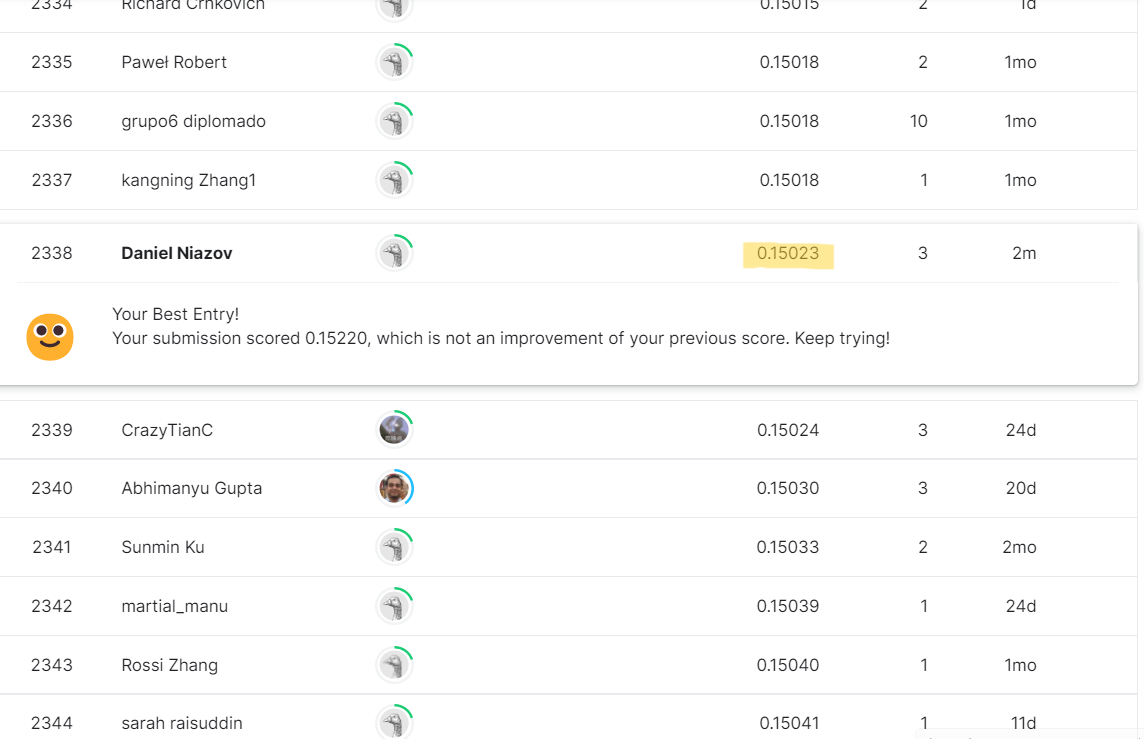

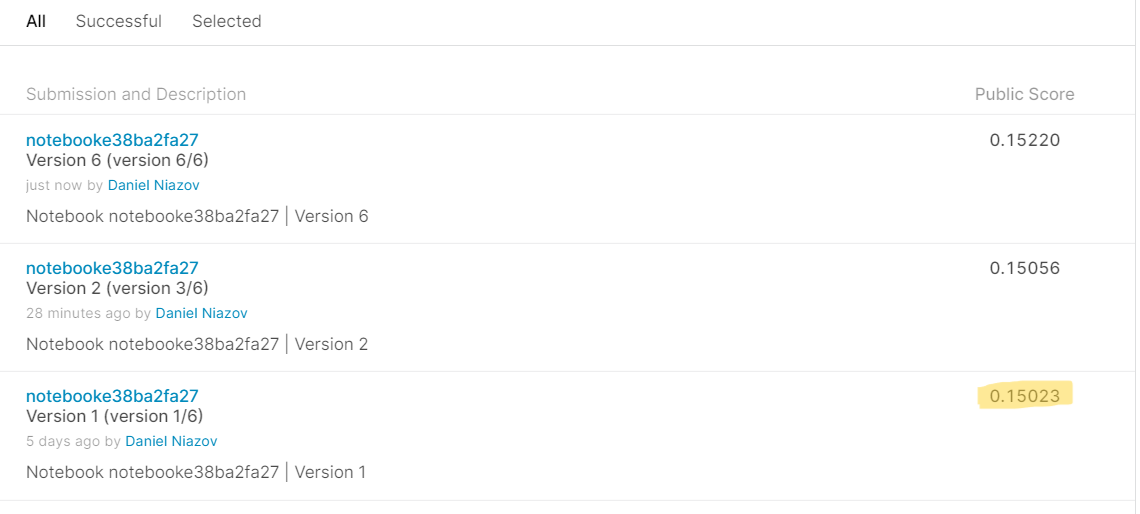

# **Conclusion**

I show a data investigation on the data which included checking if all the examples in the columns have values and if not, I used sweetviz and autoviz to display as much data on the data including graphs and correlations between features. After testing whether the correlation to the target feature is less than 0.1 I decided to drop those features from the data. I performed different experiments using feature selection so that in the end I was able to choose the best model on which to perform the prediction for the test.